<a href="https://colab.research.google.com/github/kluless13/fishtally/blob/test/deepfish_fishtally.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue May 14 07:05:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip -q install ultralytics==8.0.20

from IPython import display
display.clear_output()
from ultralytics import YOLO
from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 29.8/201.2 GB disk)


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [11]:

%cd {HOME}/datasets


from roboflow import Roboflow
rf = Roboflow(api_key="2dnFoL2vjwfFBNkIUxLZ")
project = rf.workspace("klulessml").project("7117-bivyg")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to 7117-2 in yolov8:: 100%|██████████| 1460/1460 [00:00<00:00, 7644.72it/s]


In [12]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data= /content/datasets/7117-2/data.yaml epochs=60 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/datasets/7117-2/data.yaml, epochs=60, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, s

In [13]:
!ls {HOME}/runs/detect/train2/

args.yaml					     results.csv	  train_batch2.jpg
confusion_matrix.png				     results.png	  val_batch0_labels.jpg
events.out.tfevents.1715672771.492b097b8db7.20275.0  train_batch0.jpg	  val_batch0_pred.jpg
F1_curve.png					     train_batch1.jpg	  val_batch1_labels.jpg
P_curve.png					     train_batch2000.jpg  val_batch1_pred.jpg
PR_curve.png					     train_batch2001.jpg  weights
R_curve.png					     train_batch2002.jpg


/content


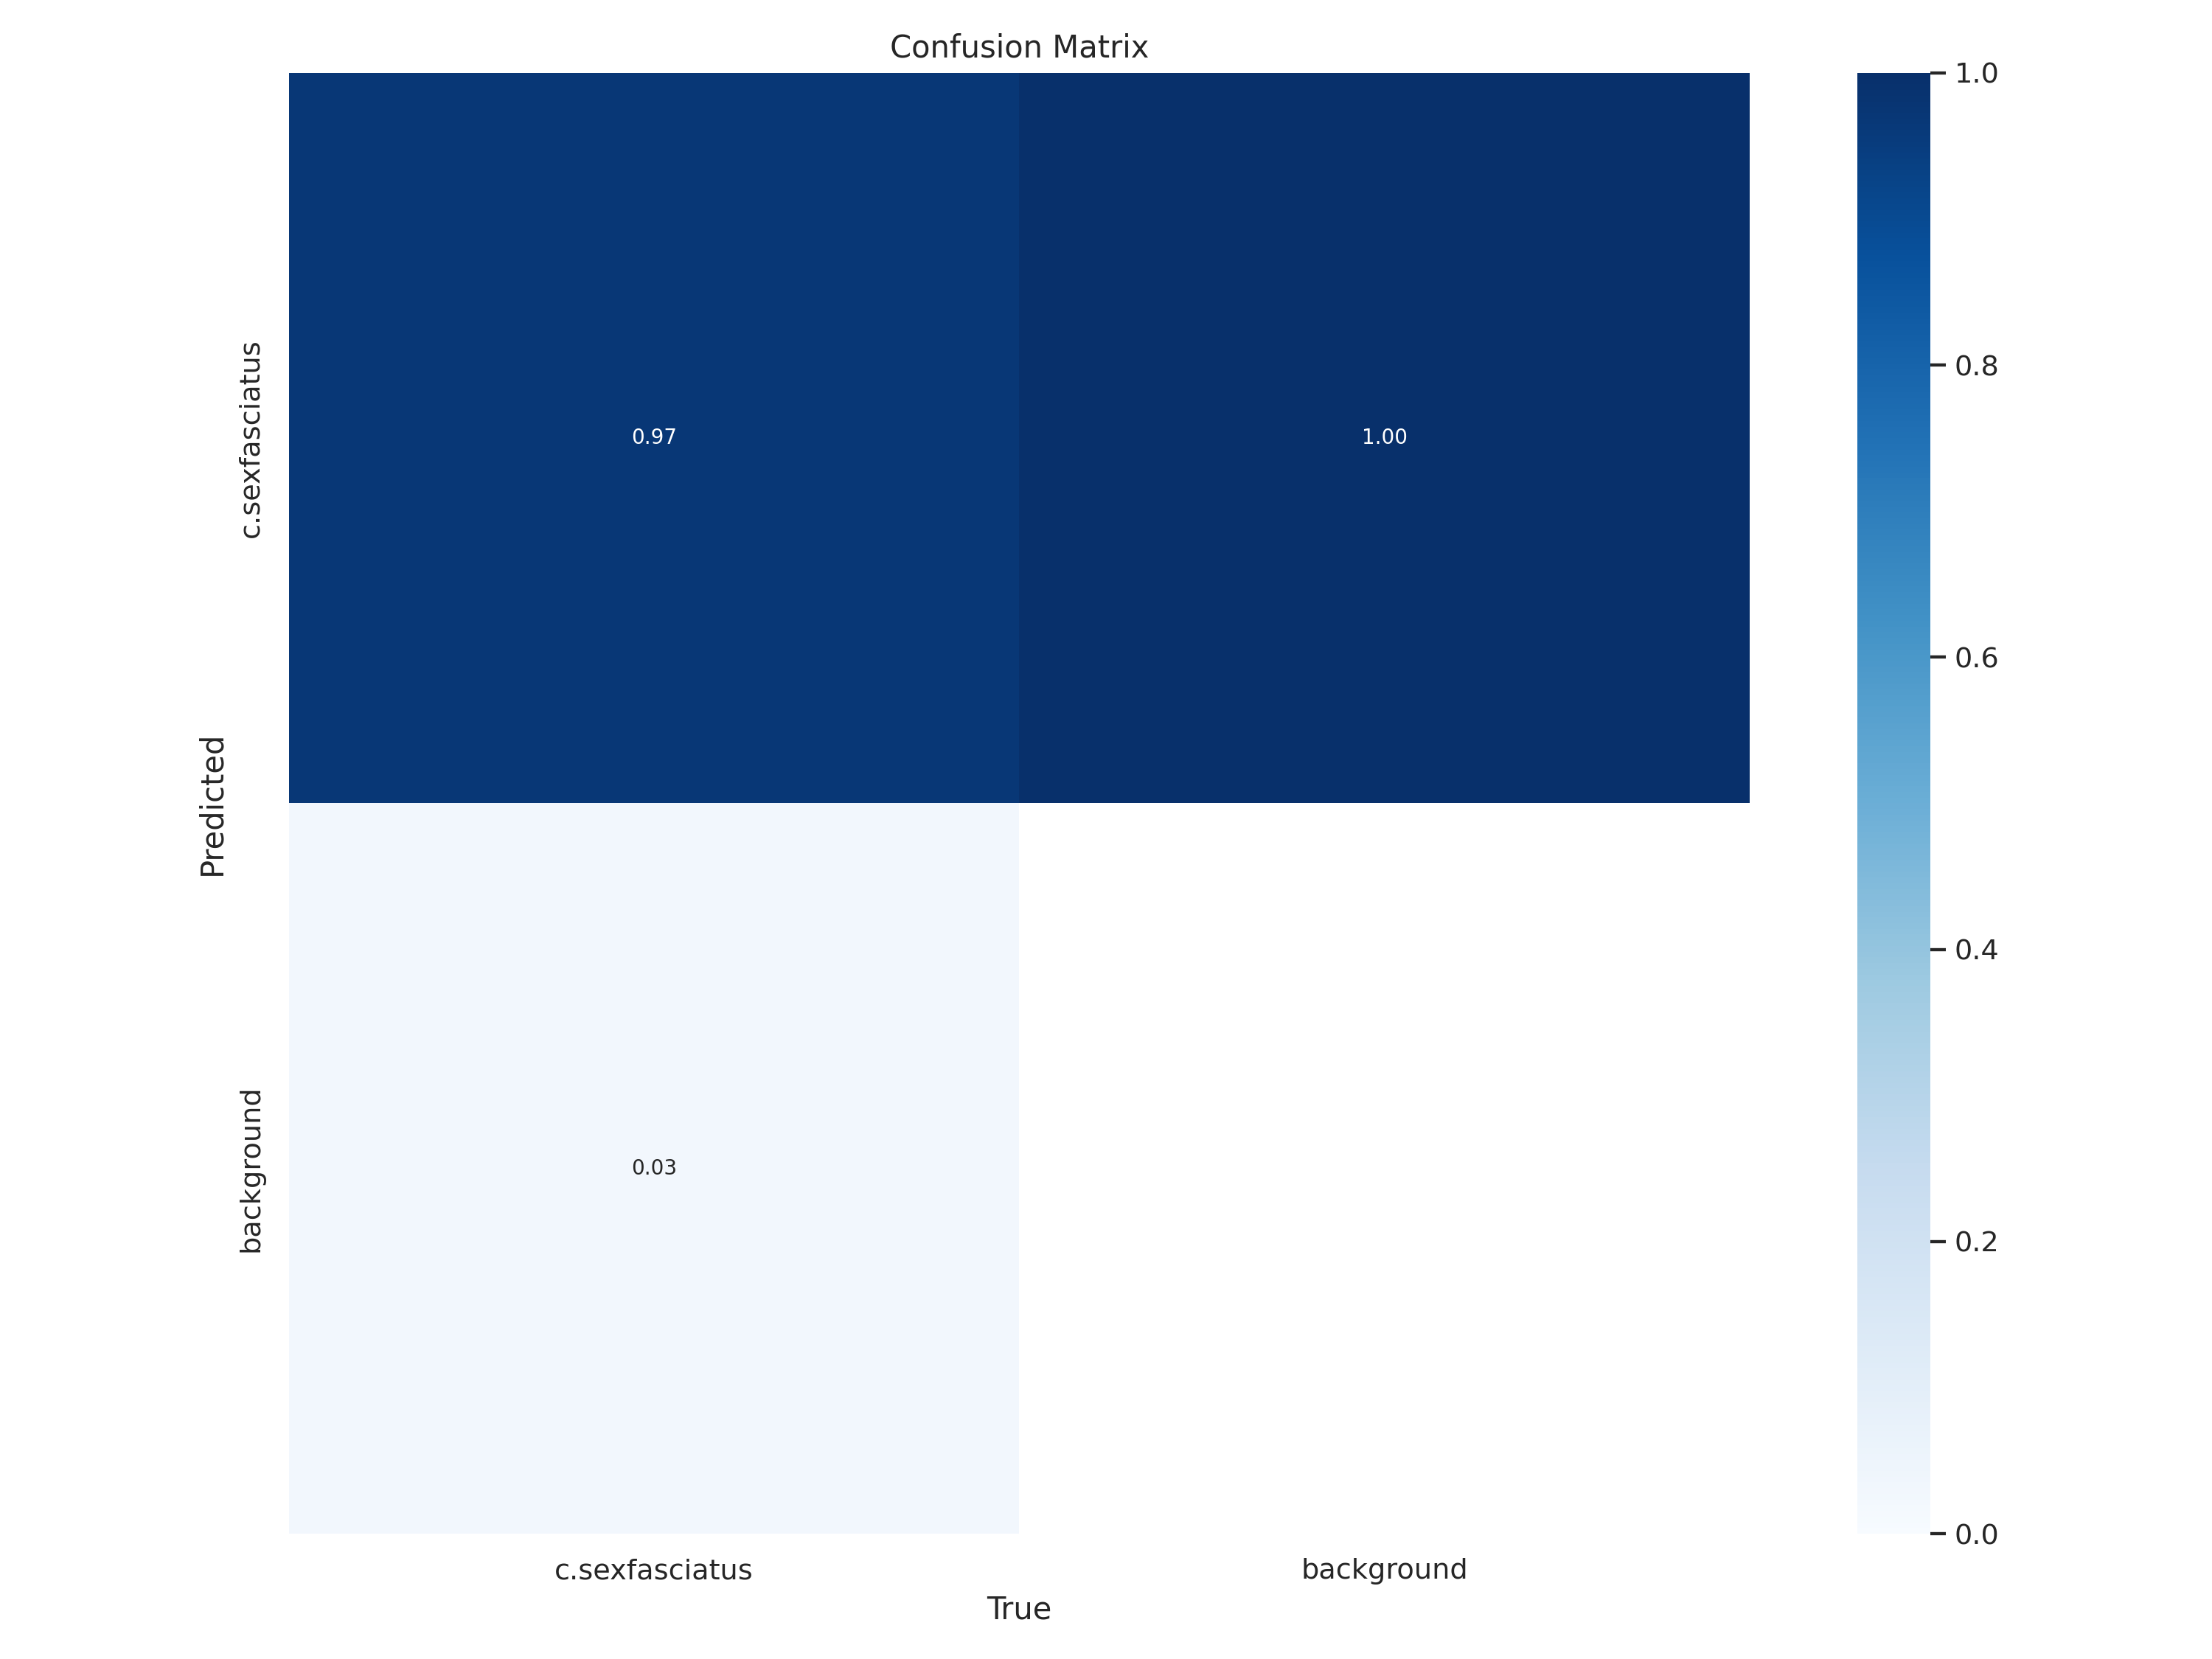

In [14]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


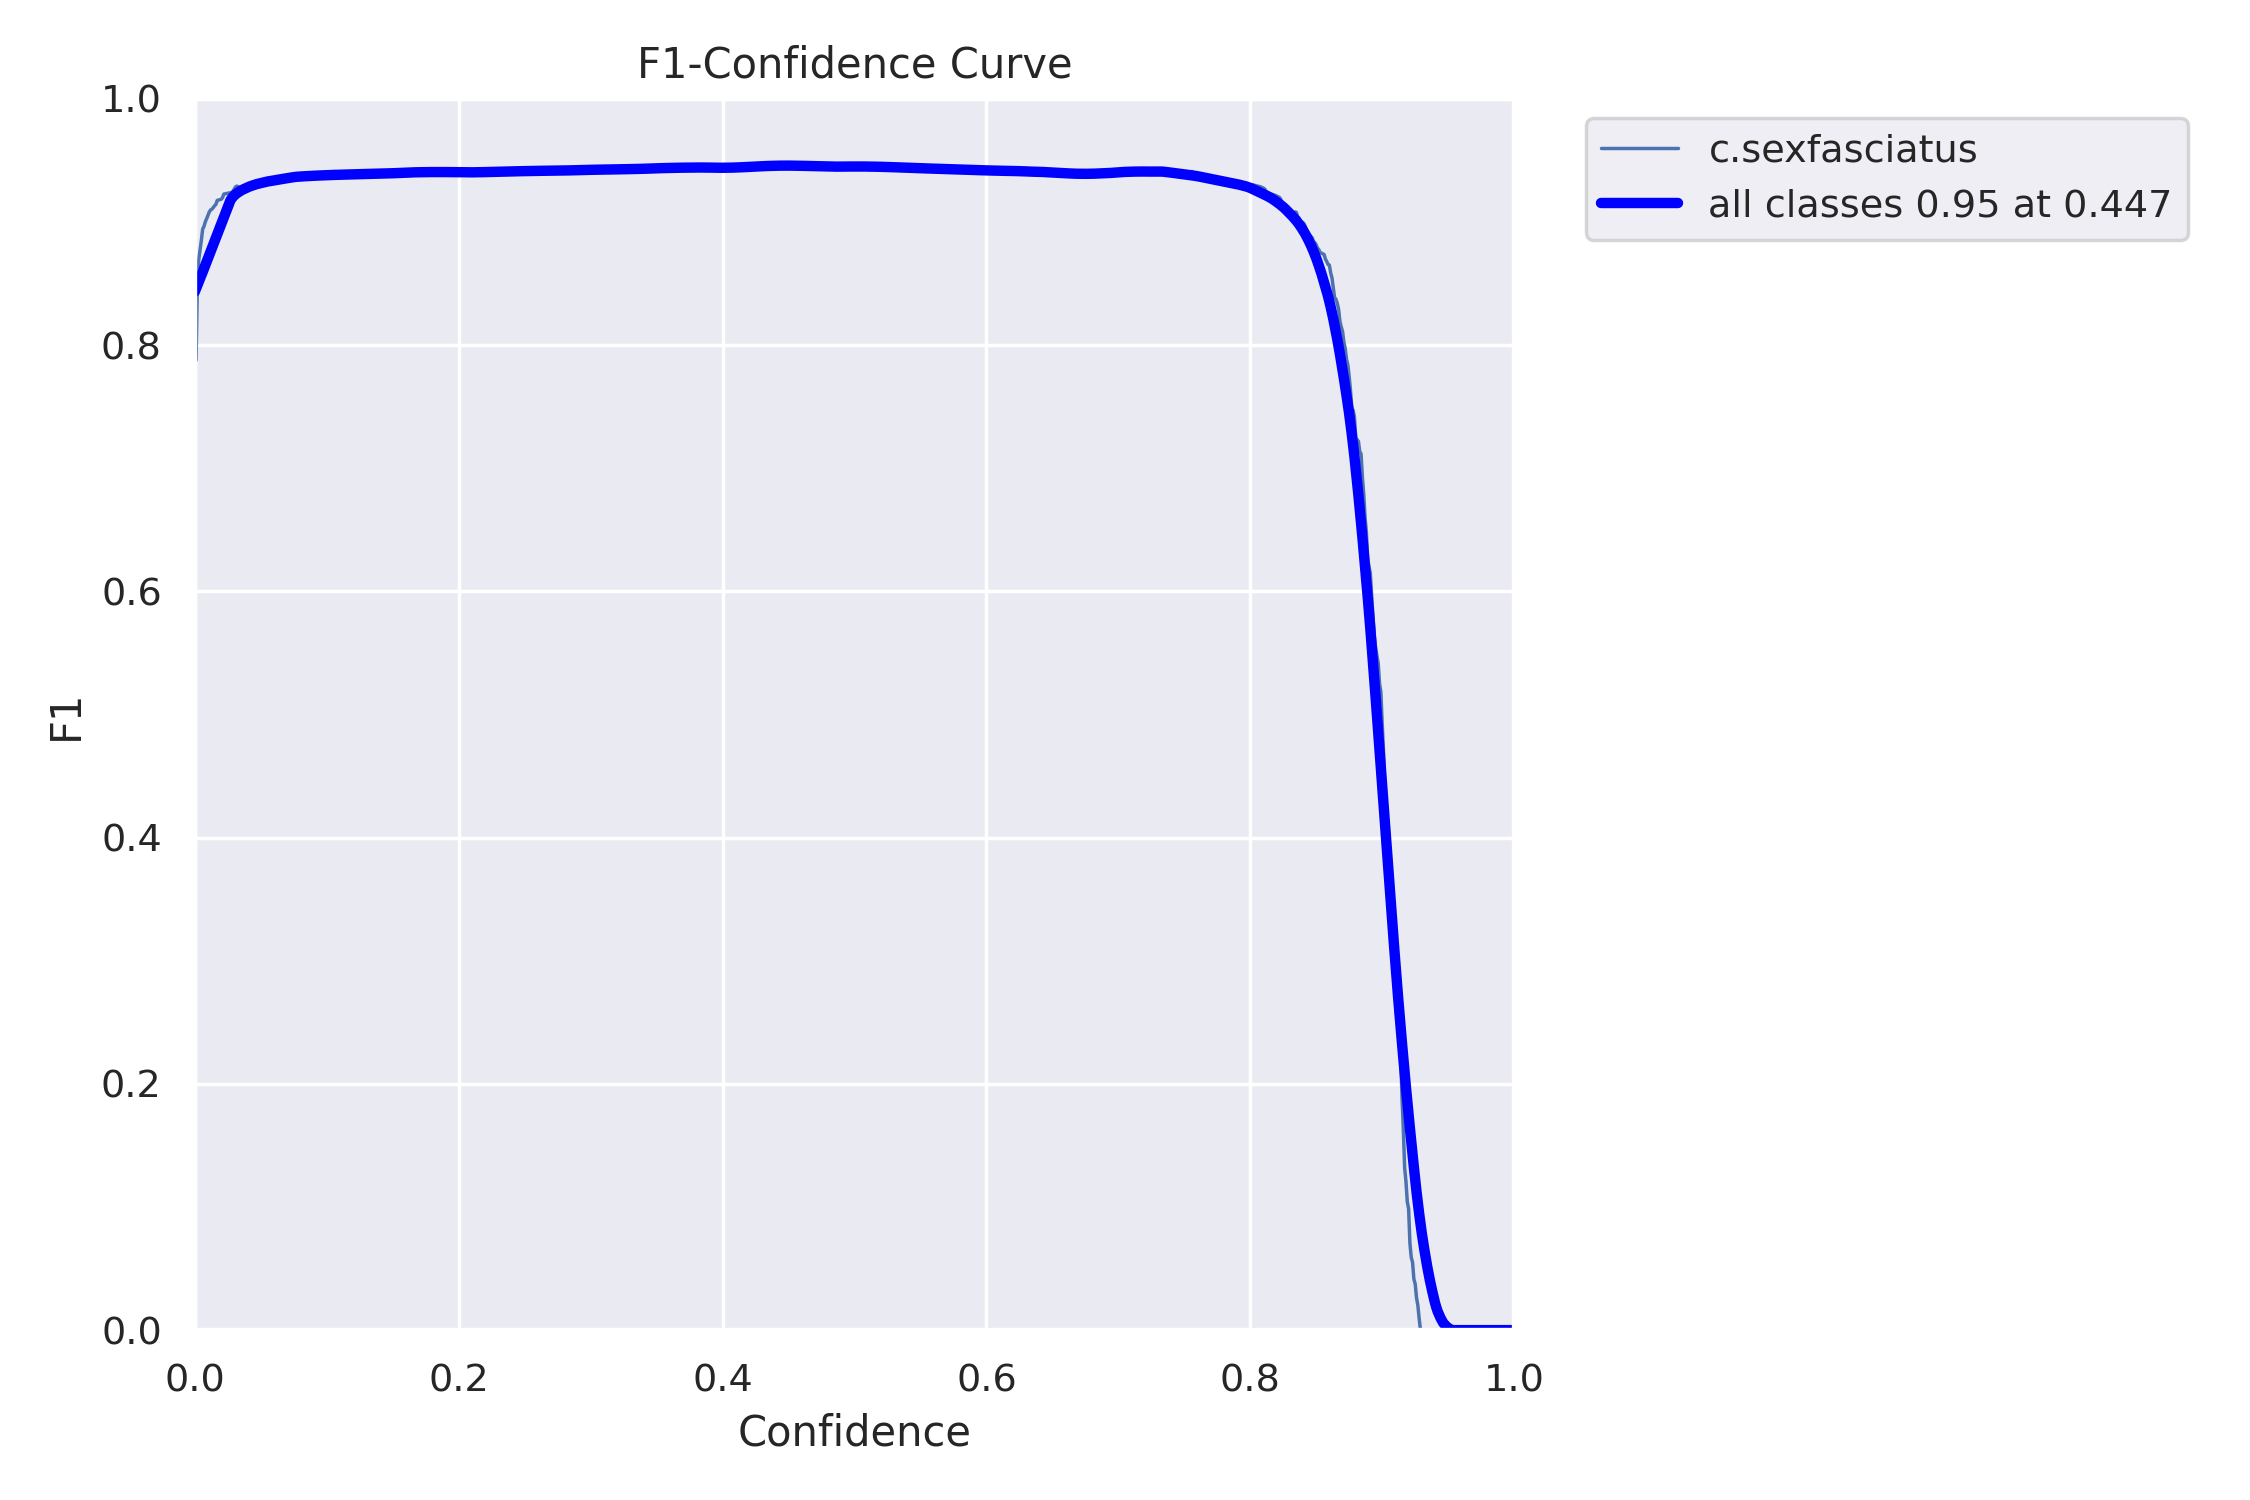

In [15]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train2/F1_curve.png', width=600)

/content


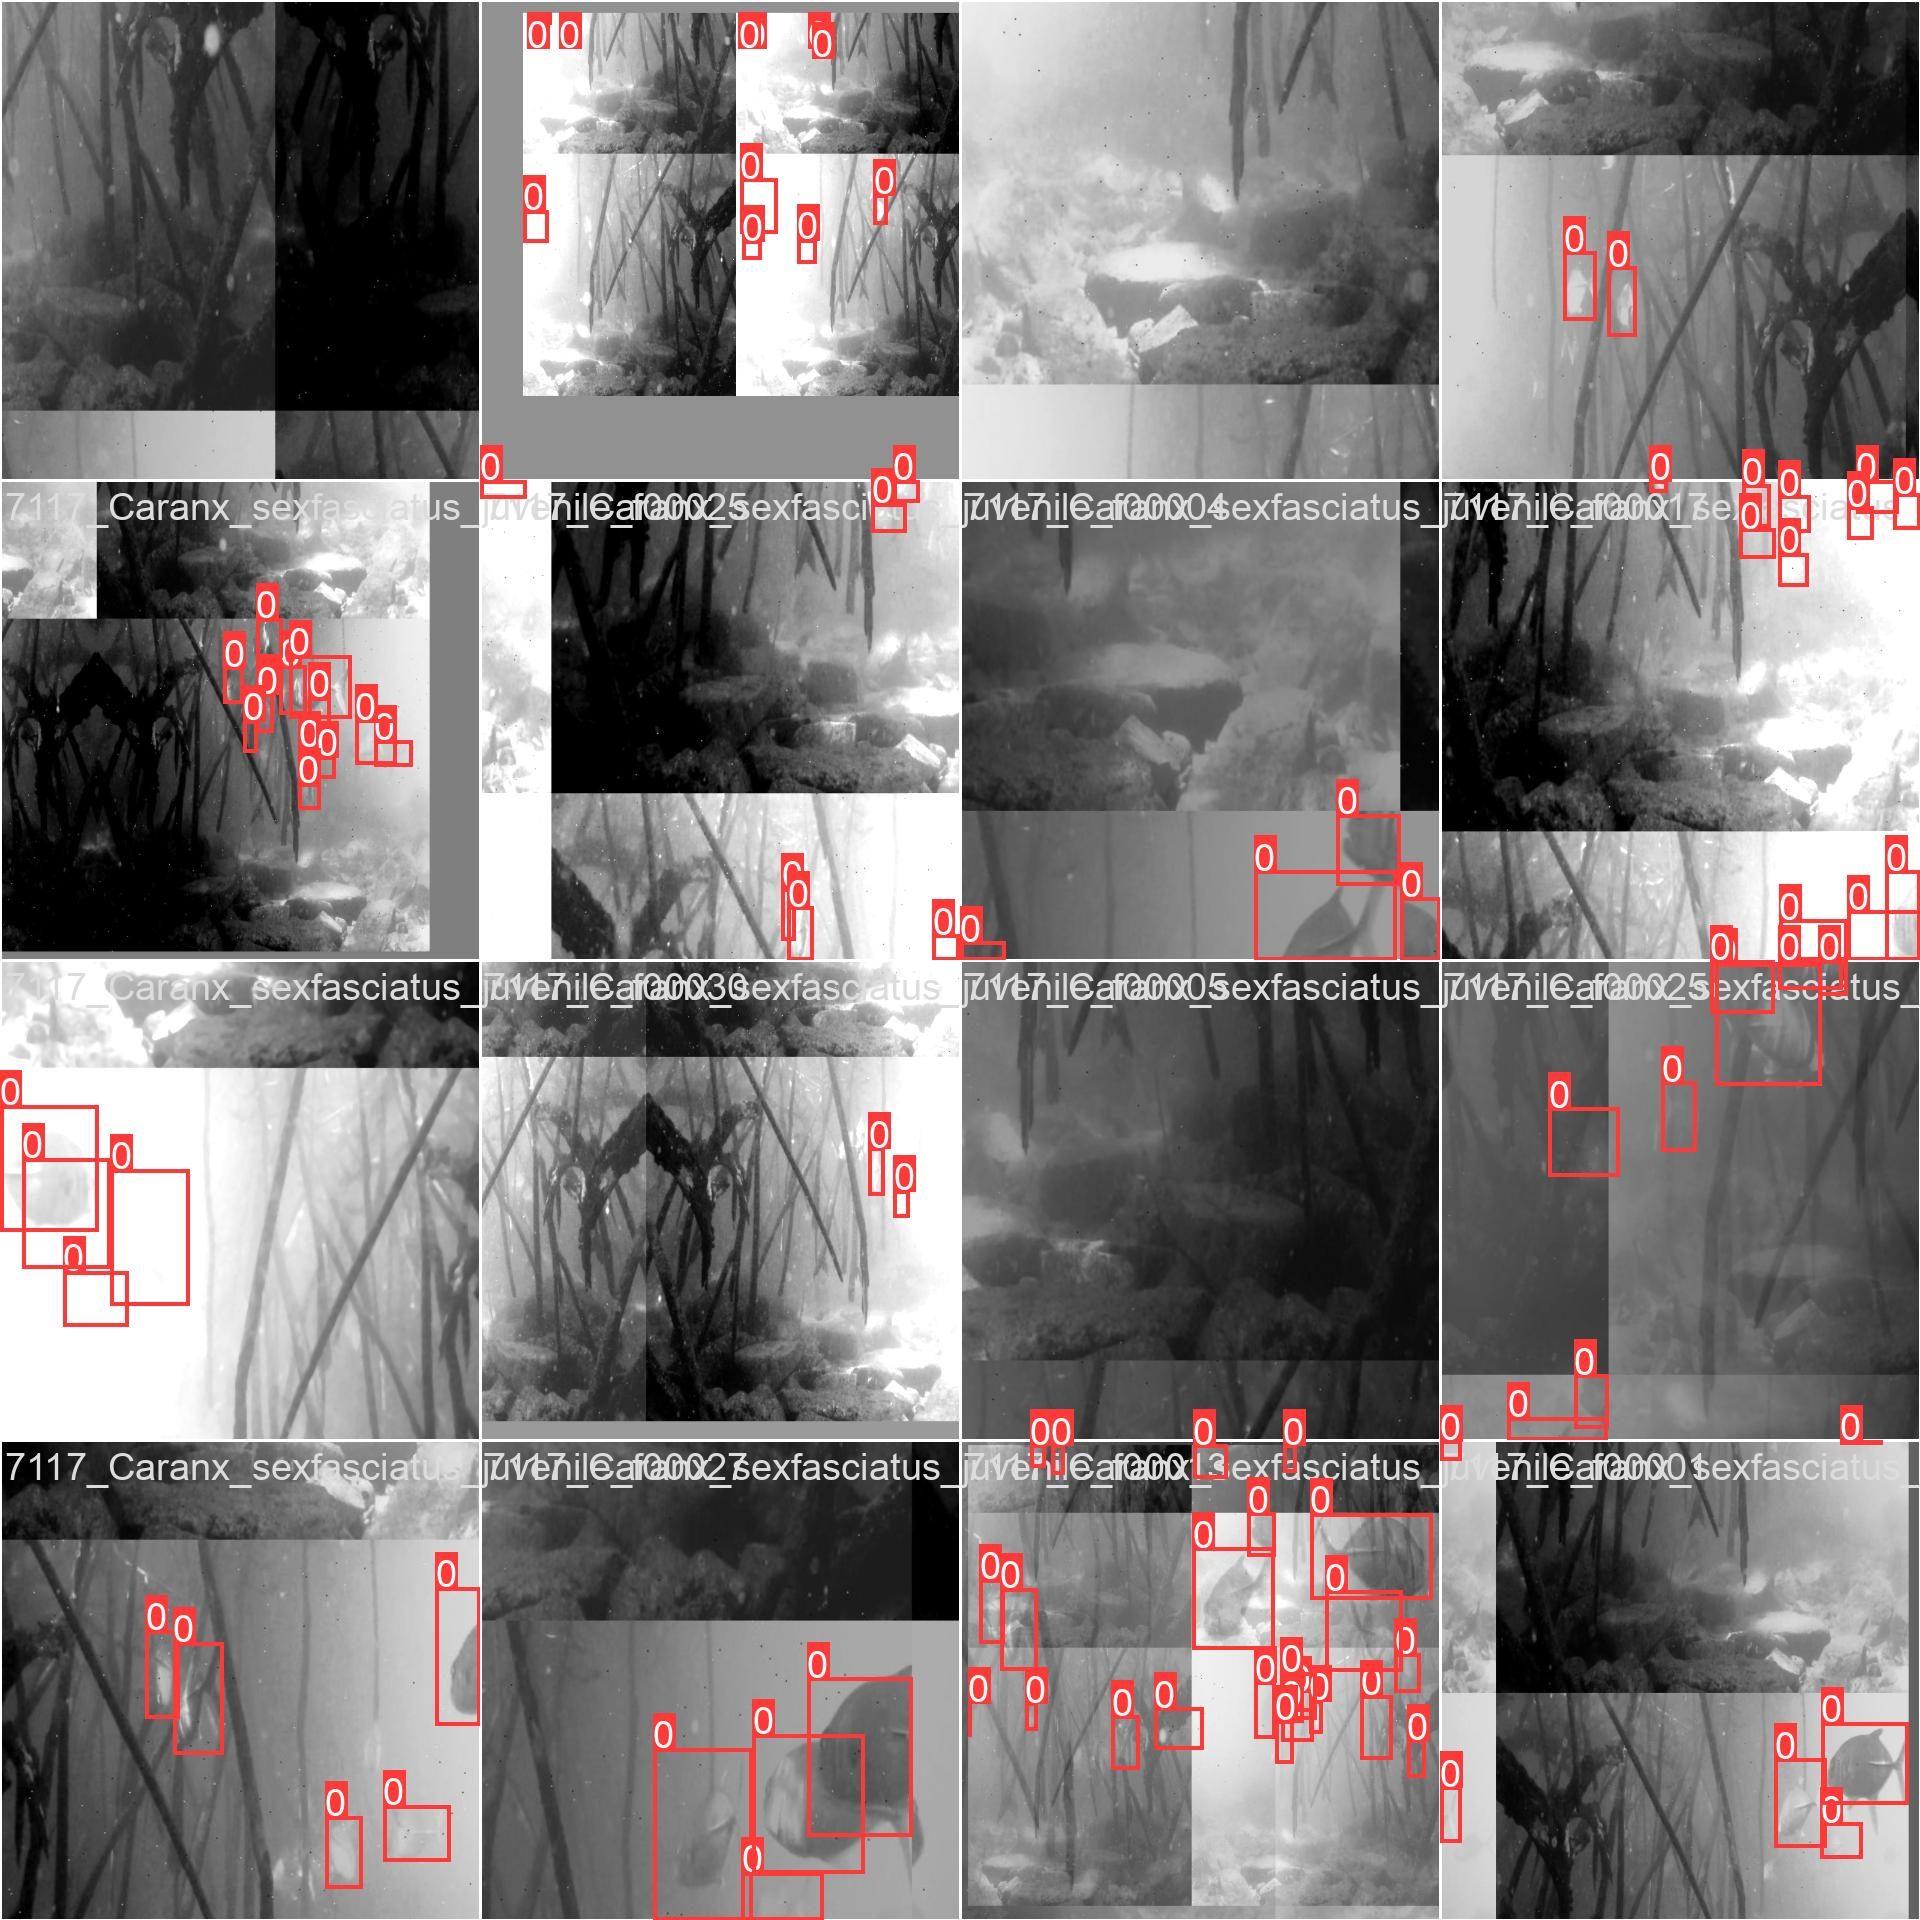

In [16]:
%cd {HOME}

Image(filename='/content/runs/detect/train2/train_batch0.jpg', width=600)

/content


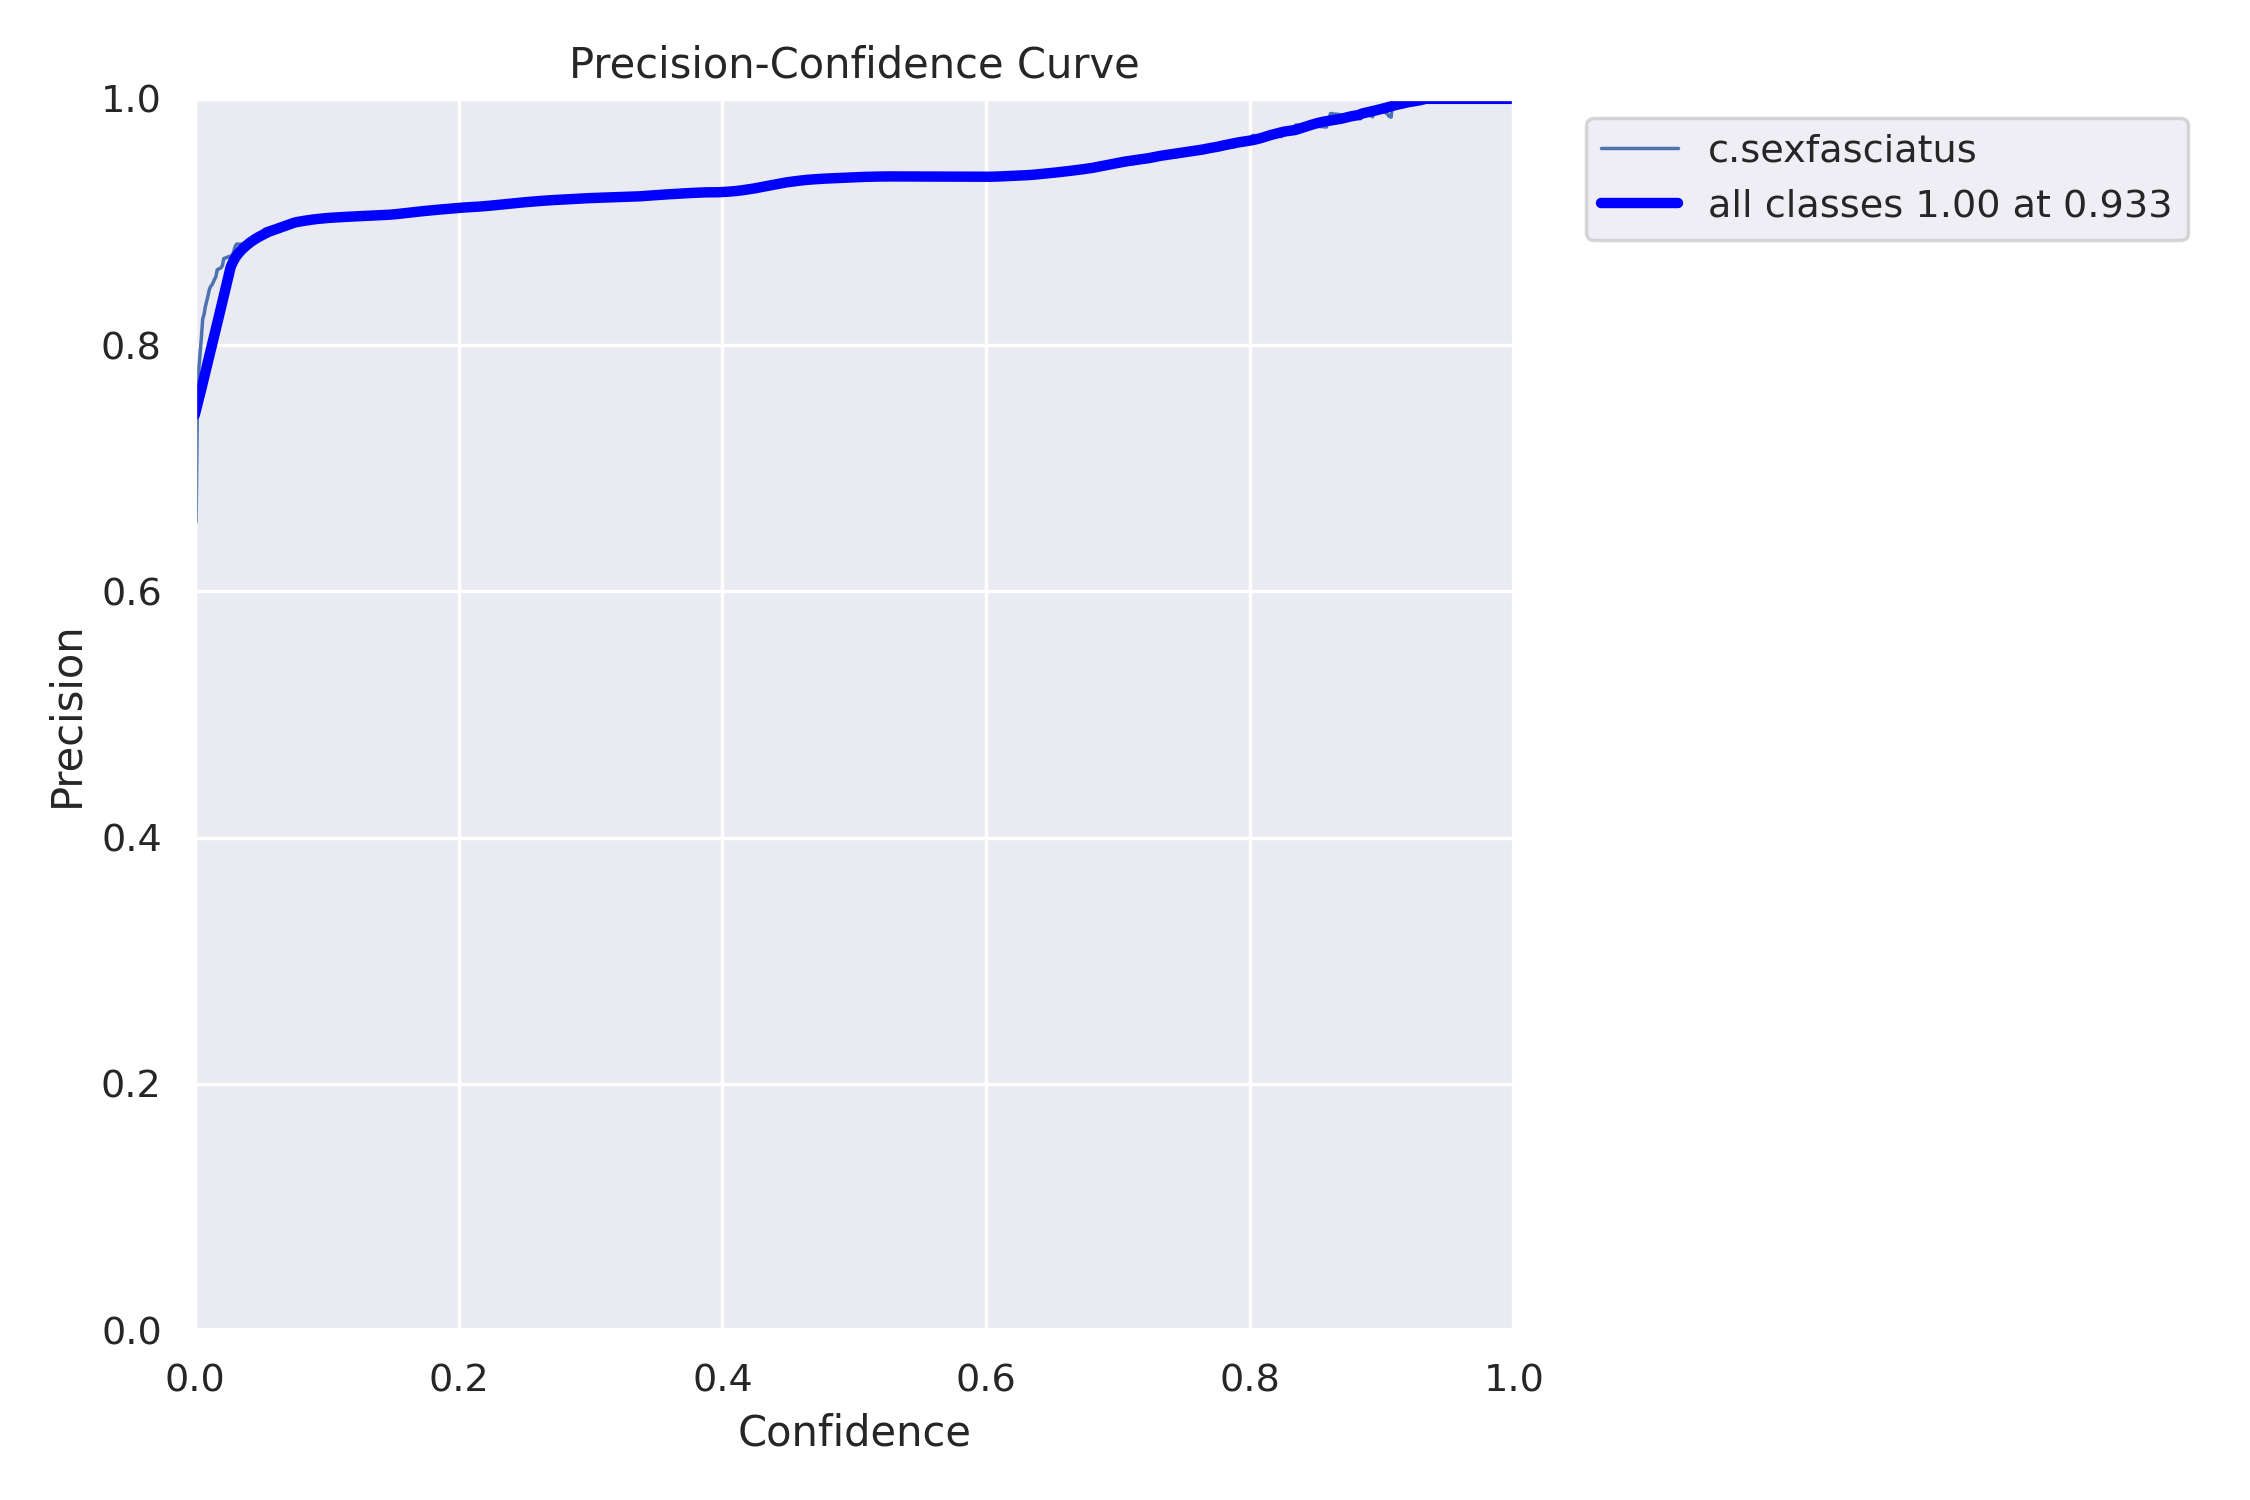

In [17]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train2/P_curve.png', width=600)

/content


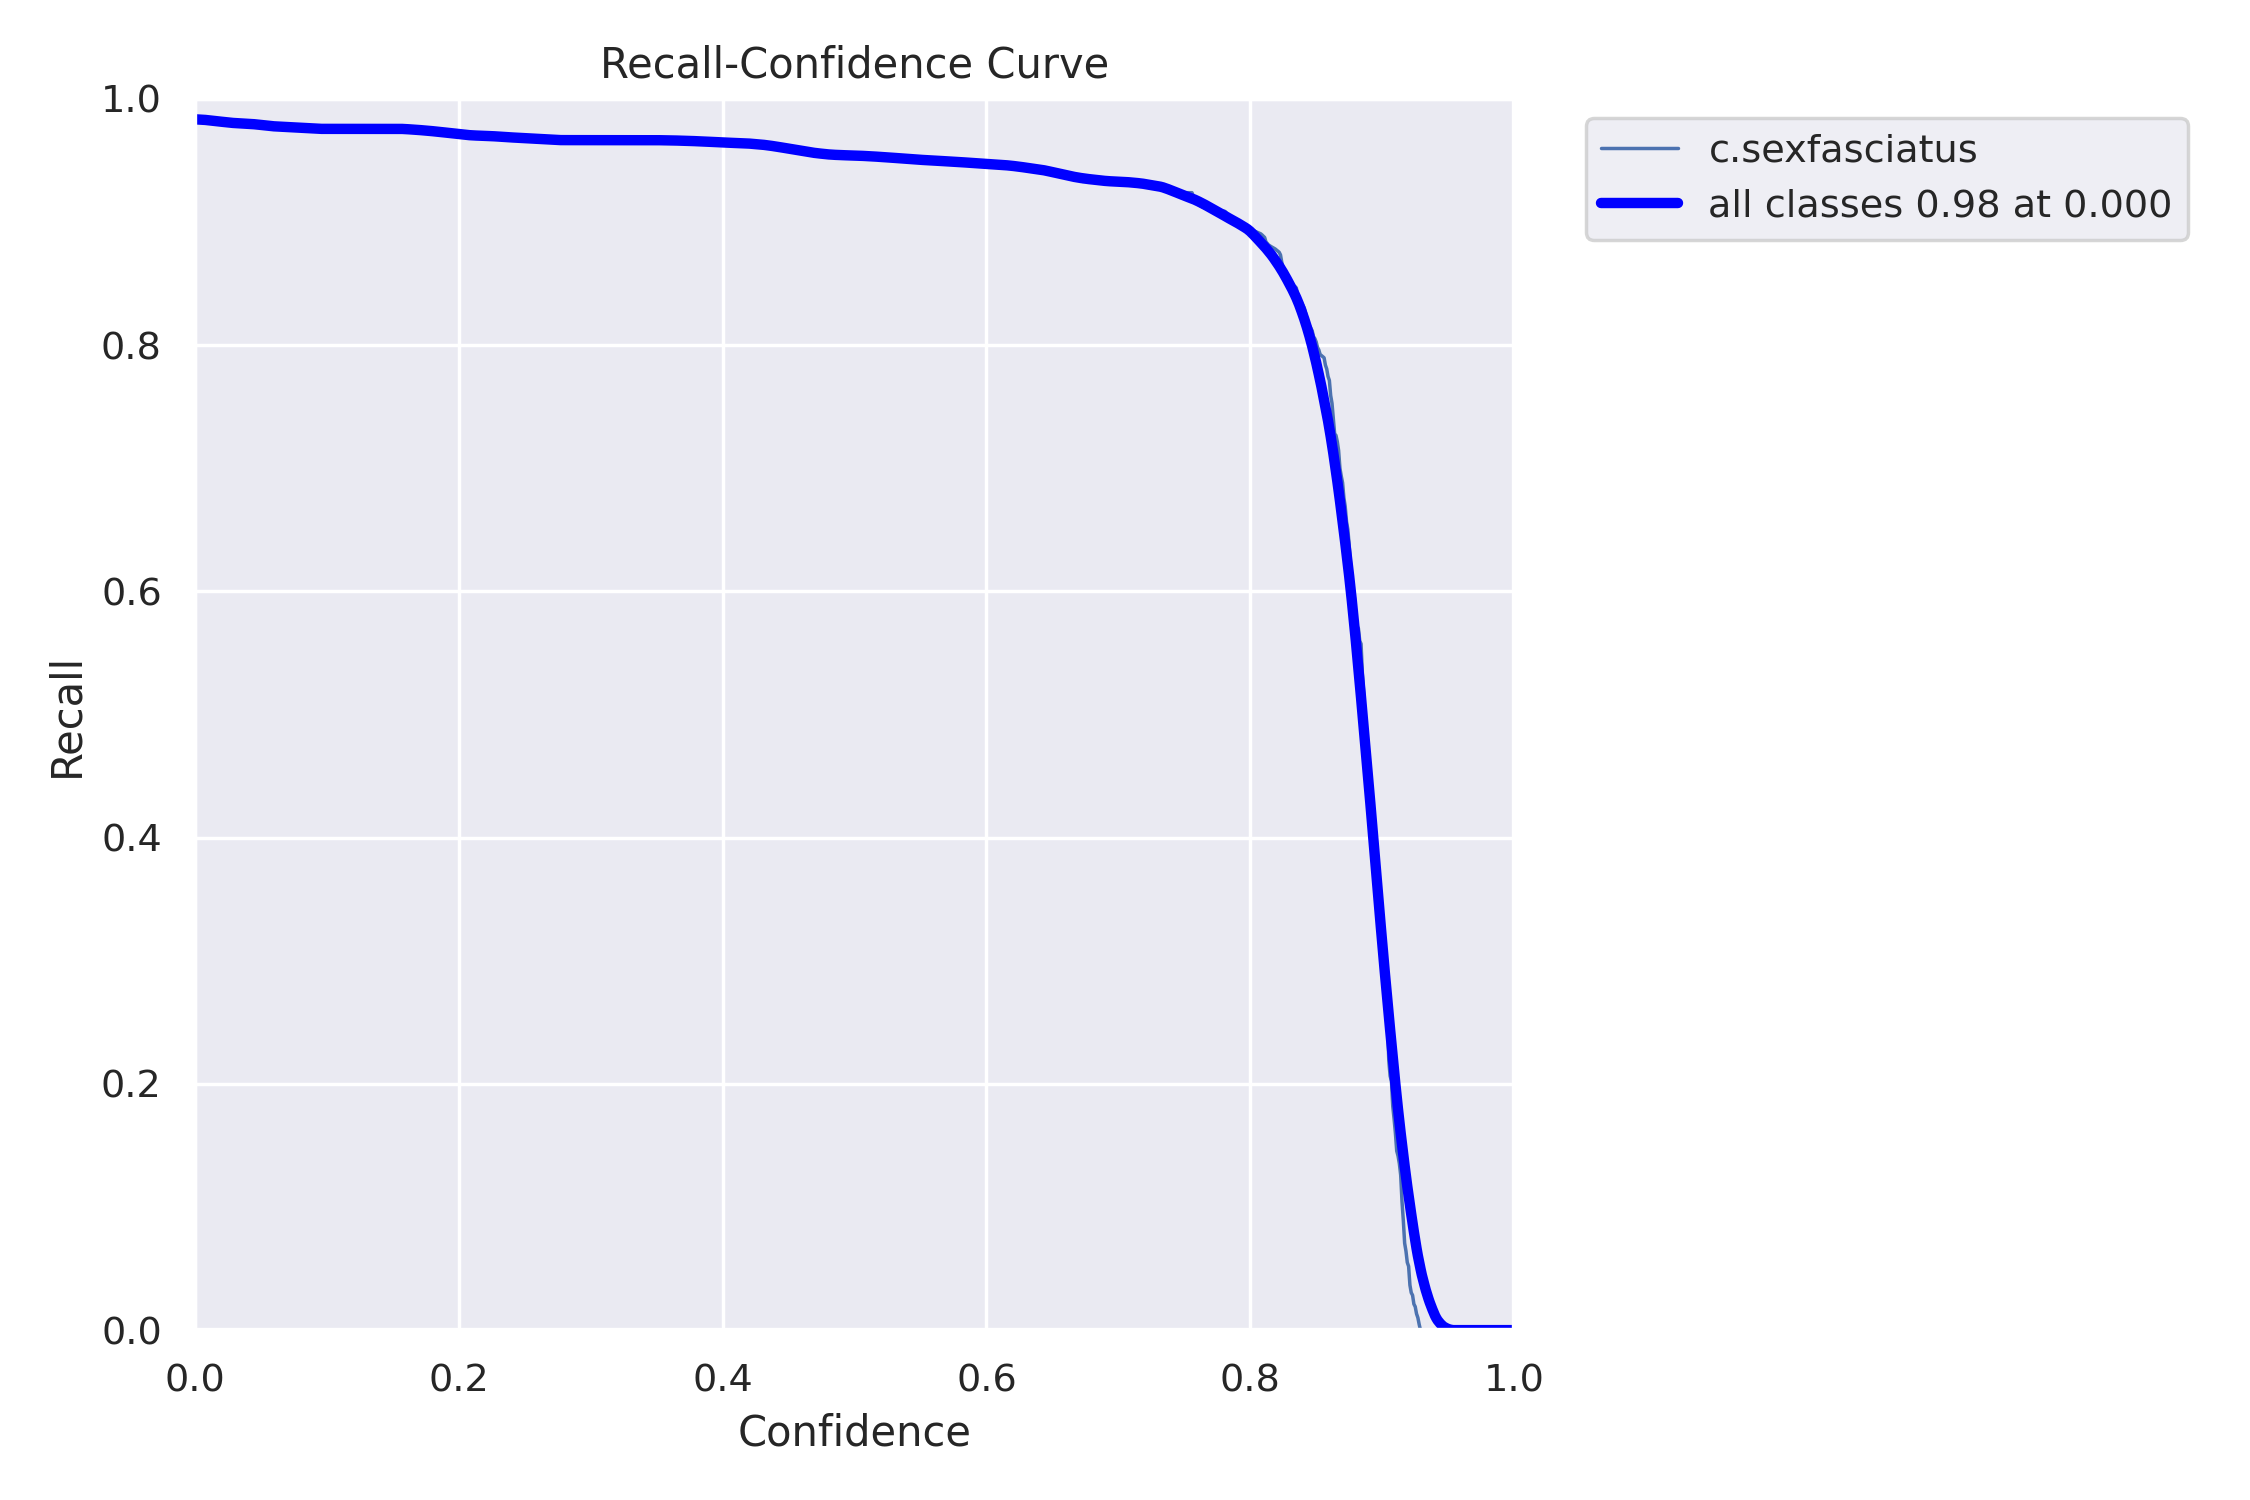

In [18]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train2/R_curve.png', width=600)

/content


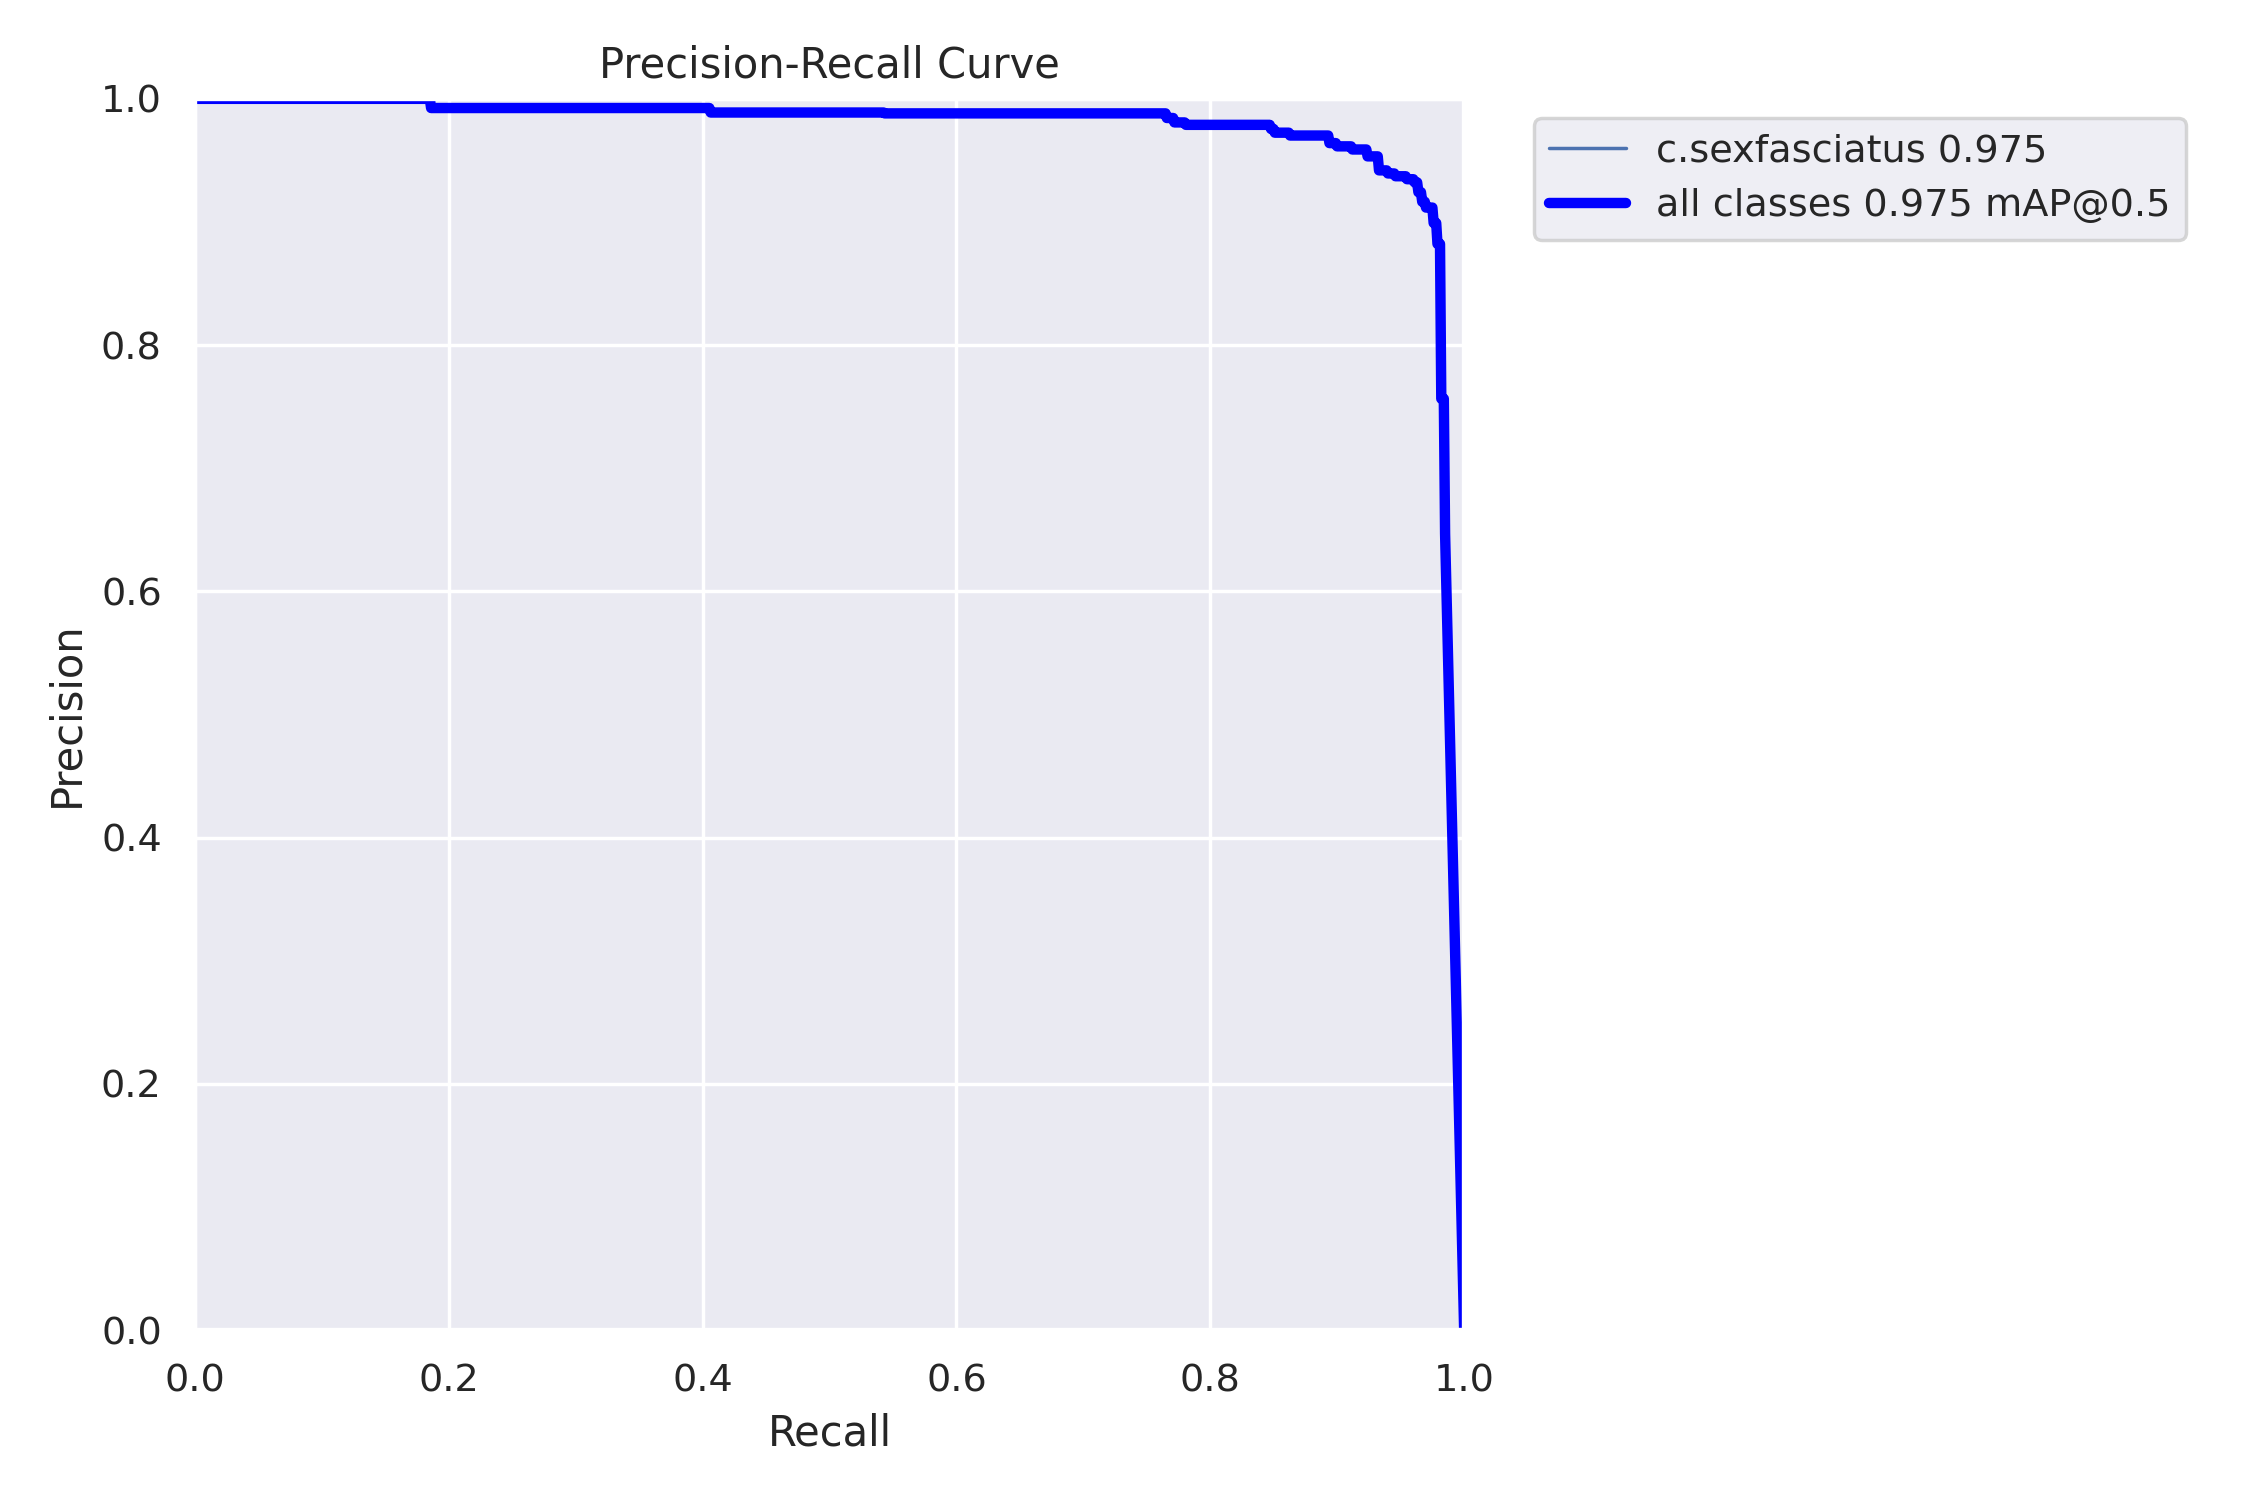

In [19]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train2/PR_curve.png', width=600)

In [20]:
from ultralytics import YOLO

def list_model_classes(model_weights_path):
    model = YOLO(model_weights_path)
    class_names = model.model.names
    print("Available Classes:", class_names)

model1 = '/content/runs/detect/train2/weights/best.pt'
model2 = '/content/runs/detect/train/weights/best.pt'

In [21]:
list_model_classes(model1)

Available Classes: {0: 'c.sexfasciatus'}


In [22]:
list_model_classes(model2)

Available Classes: {0: 'A.-palmaris', 1: 'L.-russellii'}


In [4]:
%mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2dnFoL2vjwfFBNkIUxLZ")
project = rf.workspace("klulessml").project("9852-faloq")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uni

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to 9852-1 in yolov8:: 100%|██████████| 664/664 [00:00<00:00, 9390.41it/s]


In [3]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data= /content/datasets/9852-1/data.yaml epochs=60 imgsz=800 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 440MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/datasets/9852-1/data.yaml, epochs=60, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opt

In [4]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png       train_batch900.jpg
confusion_matrix.png				    results.csv       train_batch901.jpg
events.out.tfevents.1715670385.492b097b8db7.5268.0  results.png       train_batch902.jpg
F1_curve.png					    train_batch0.jpg  val_batch0_labels.jpg
P_curve.png					    train_batch1.jpg  val_batch0_pred.jpg
PR_curve.png					    train_batch2.jpg  weights


/content


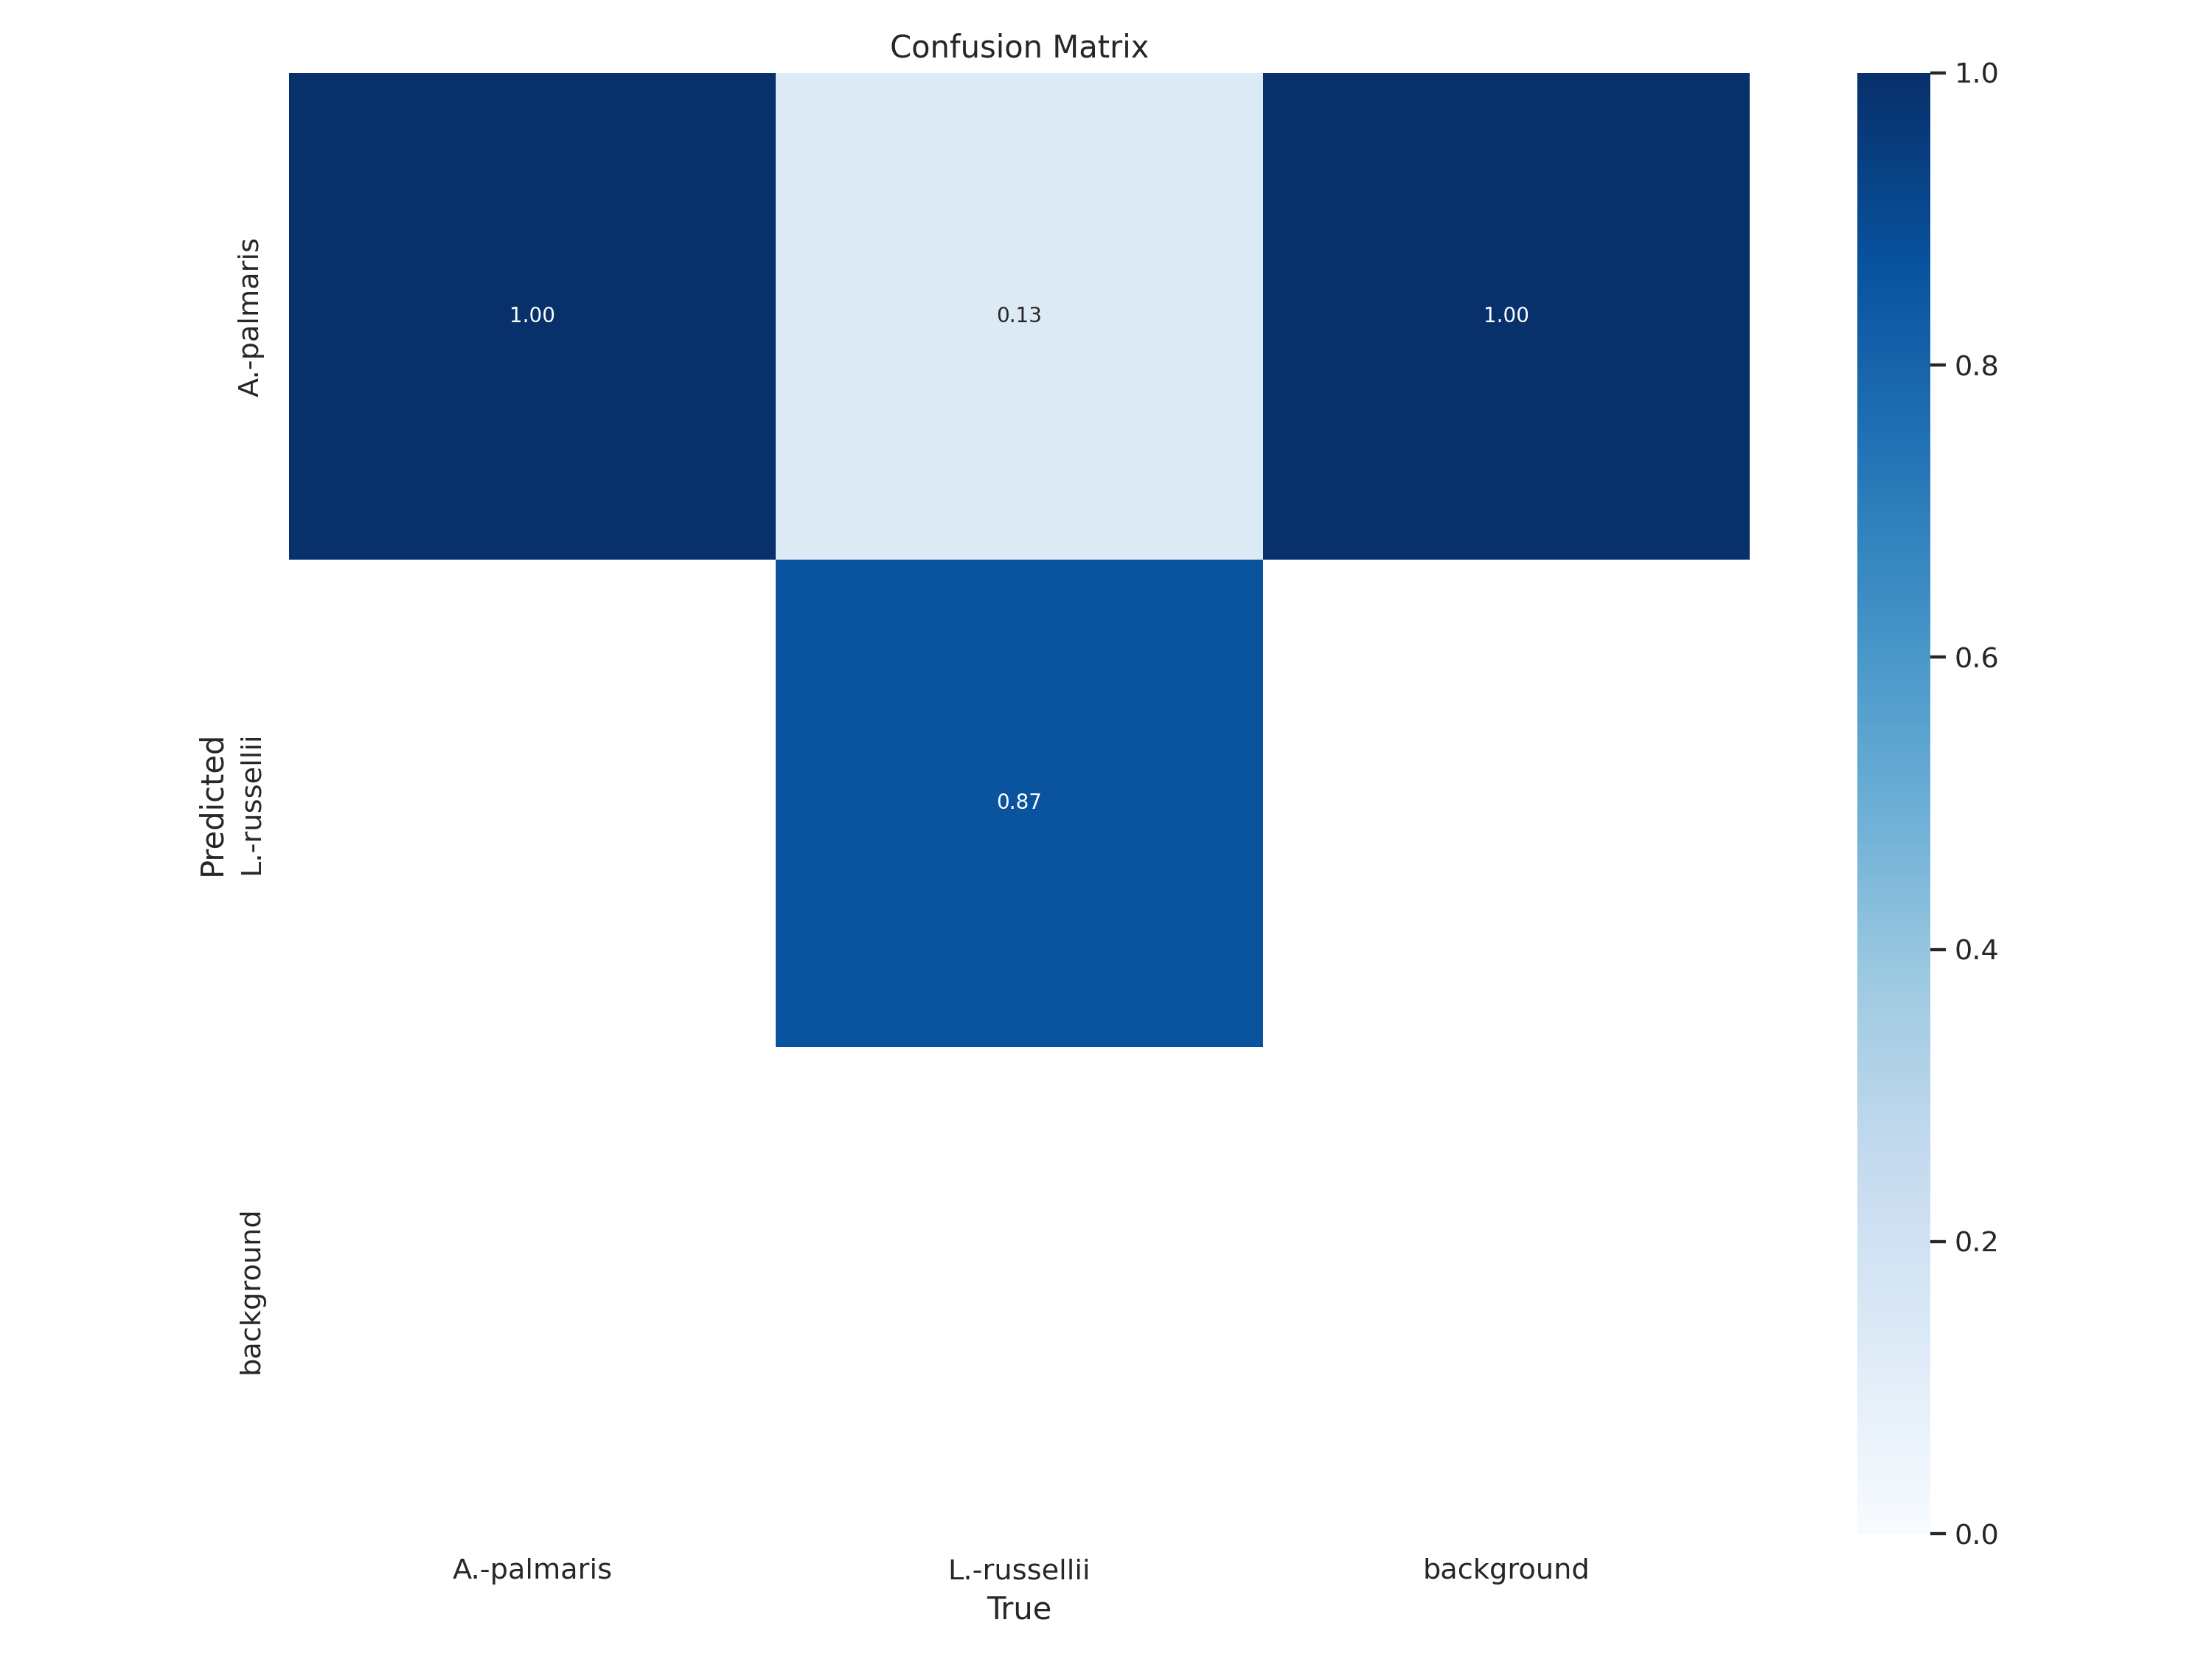

In [5]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


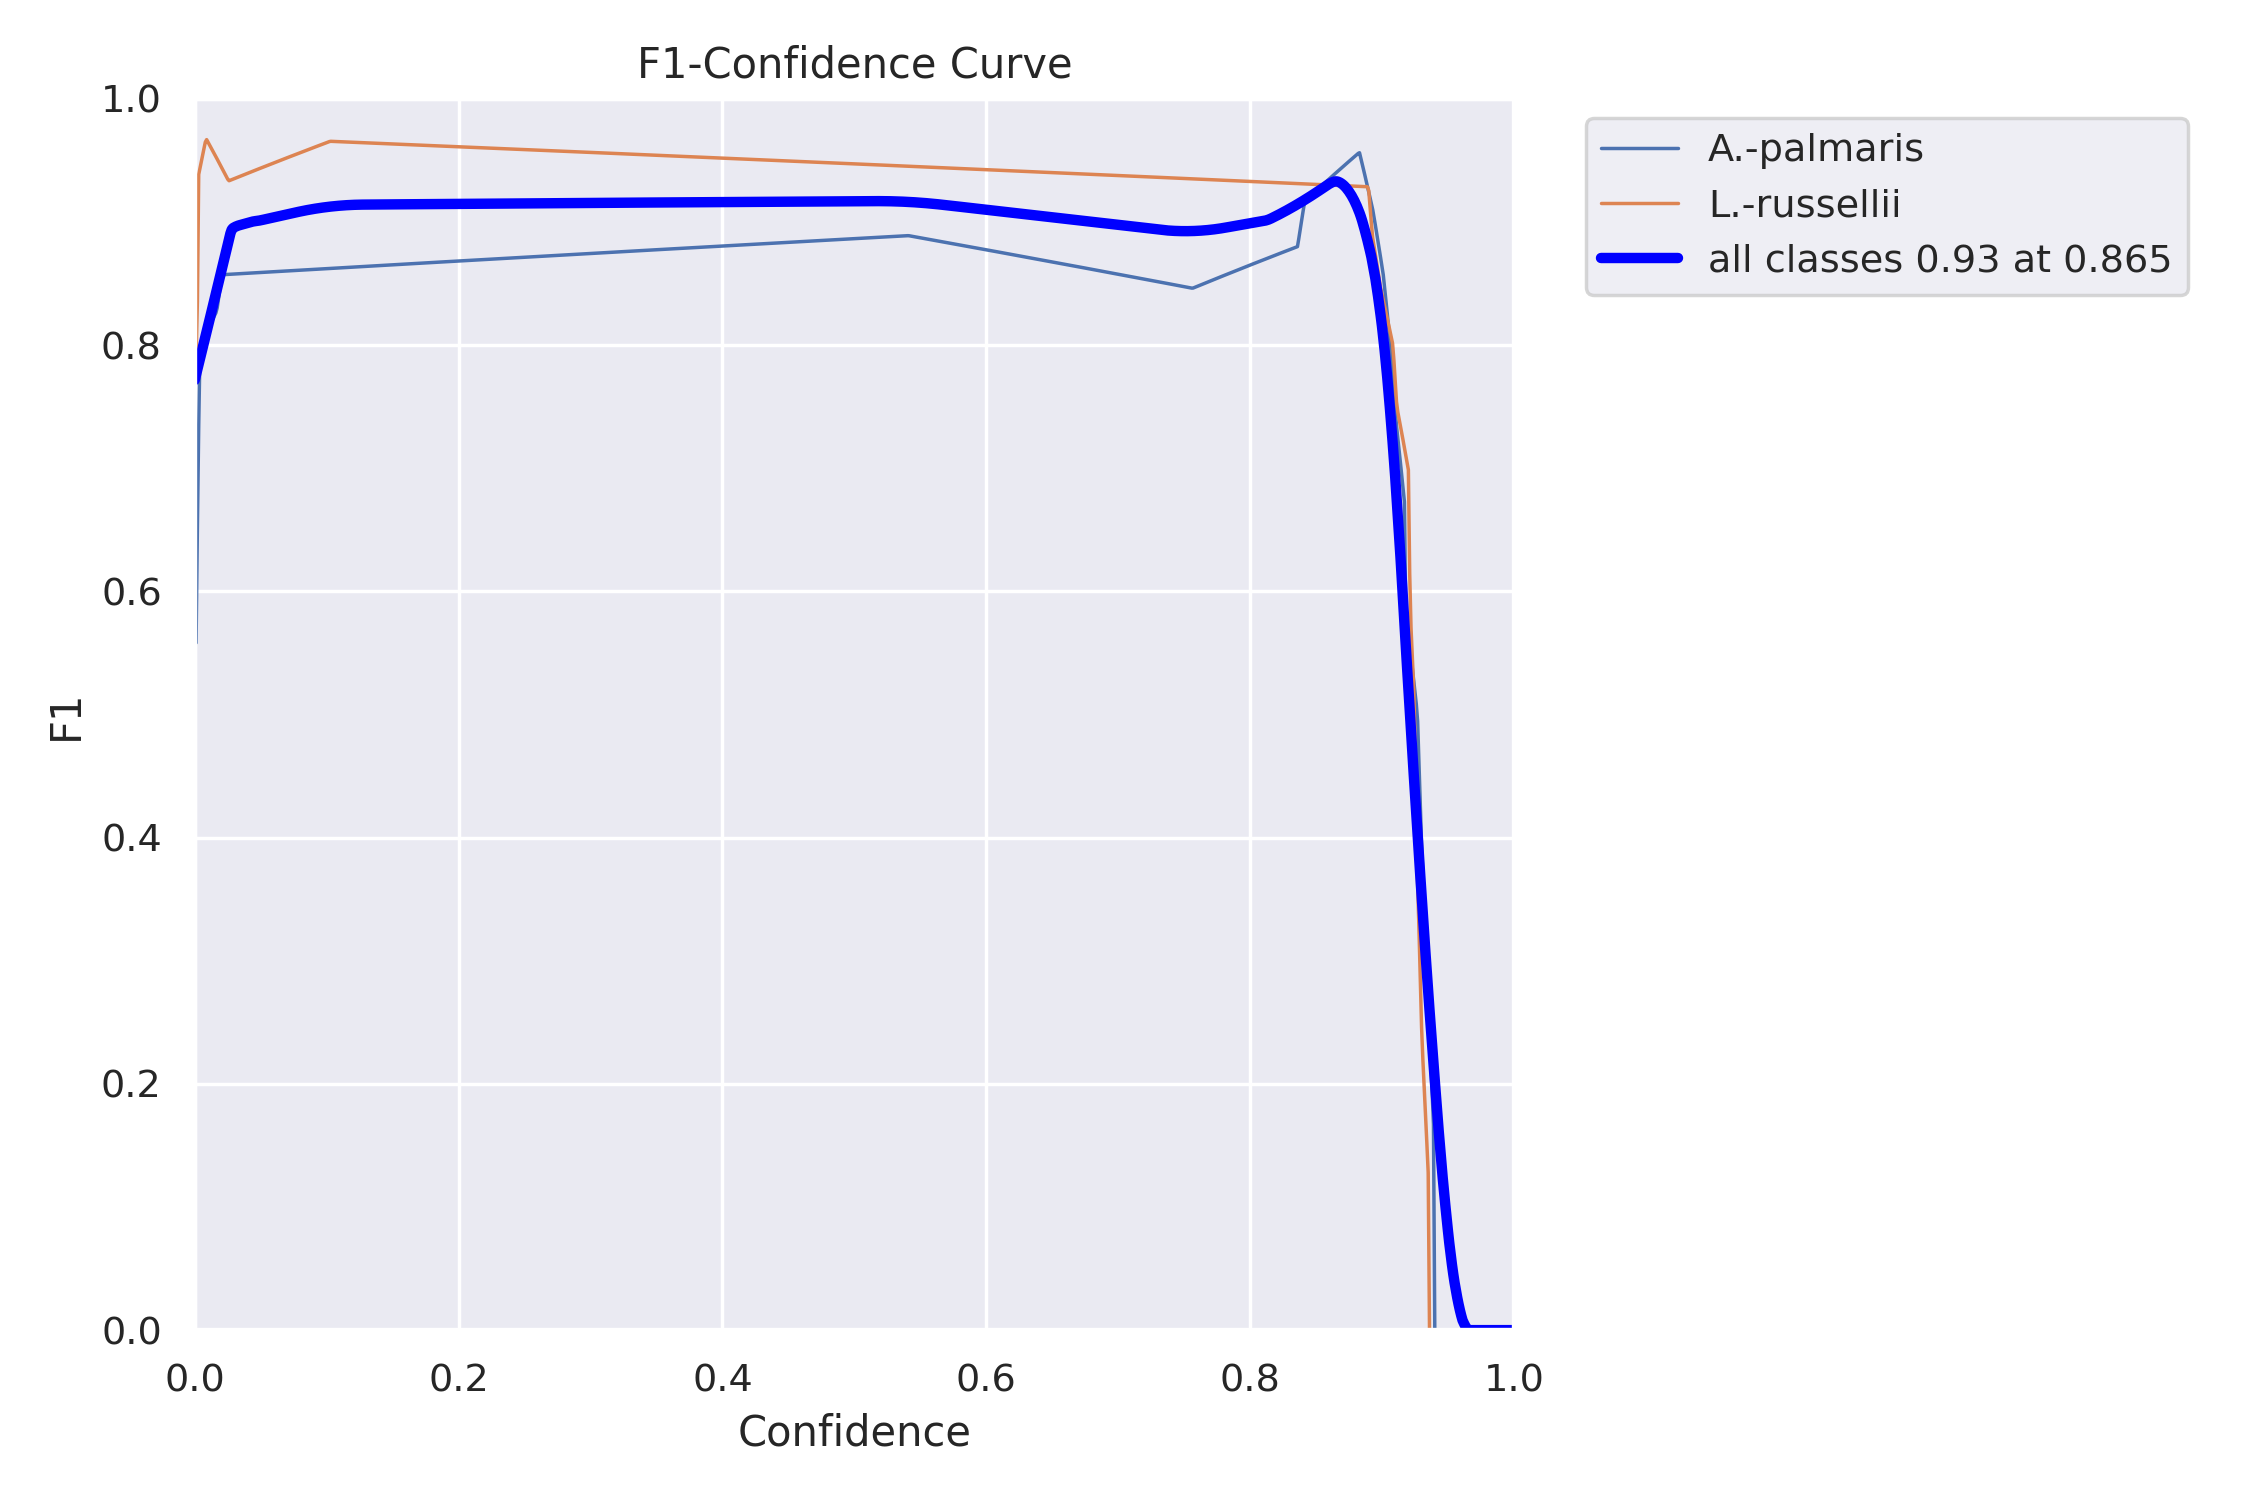

In [6]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/content


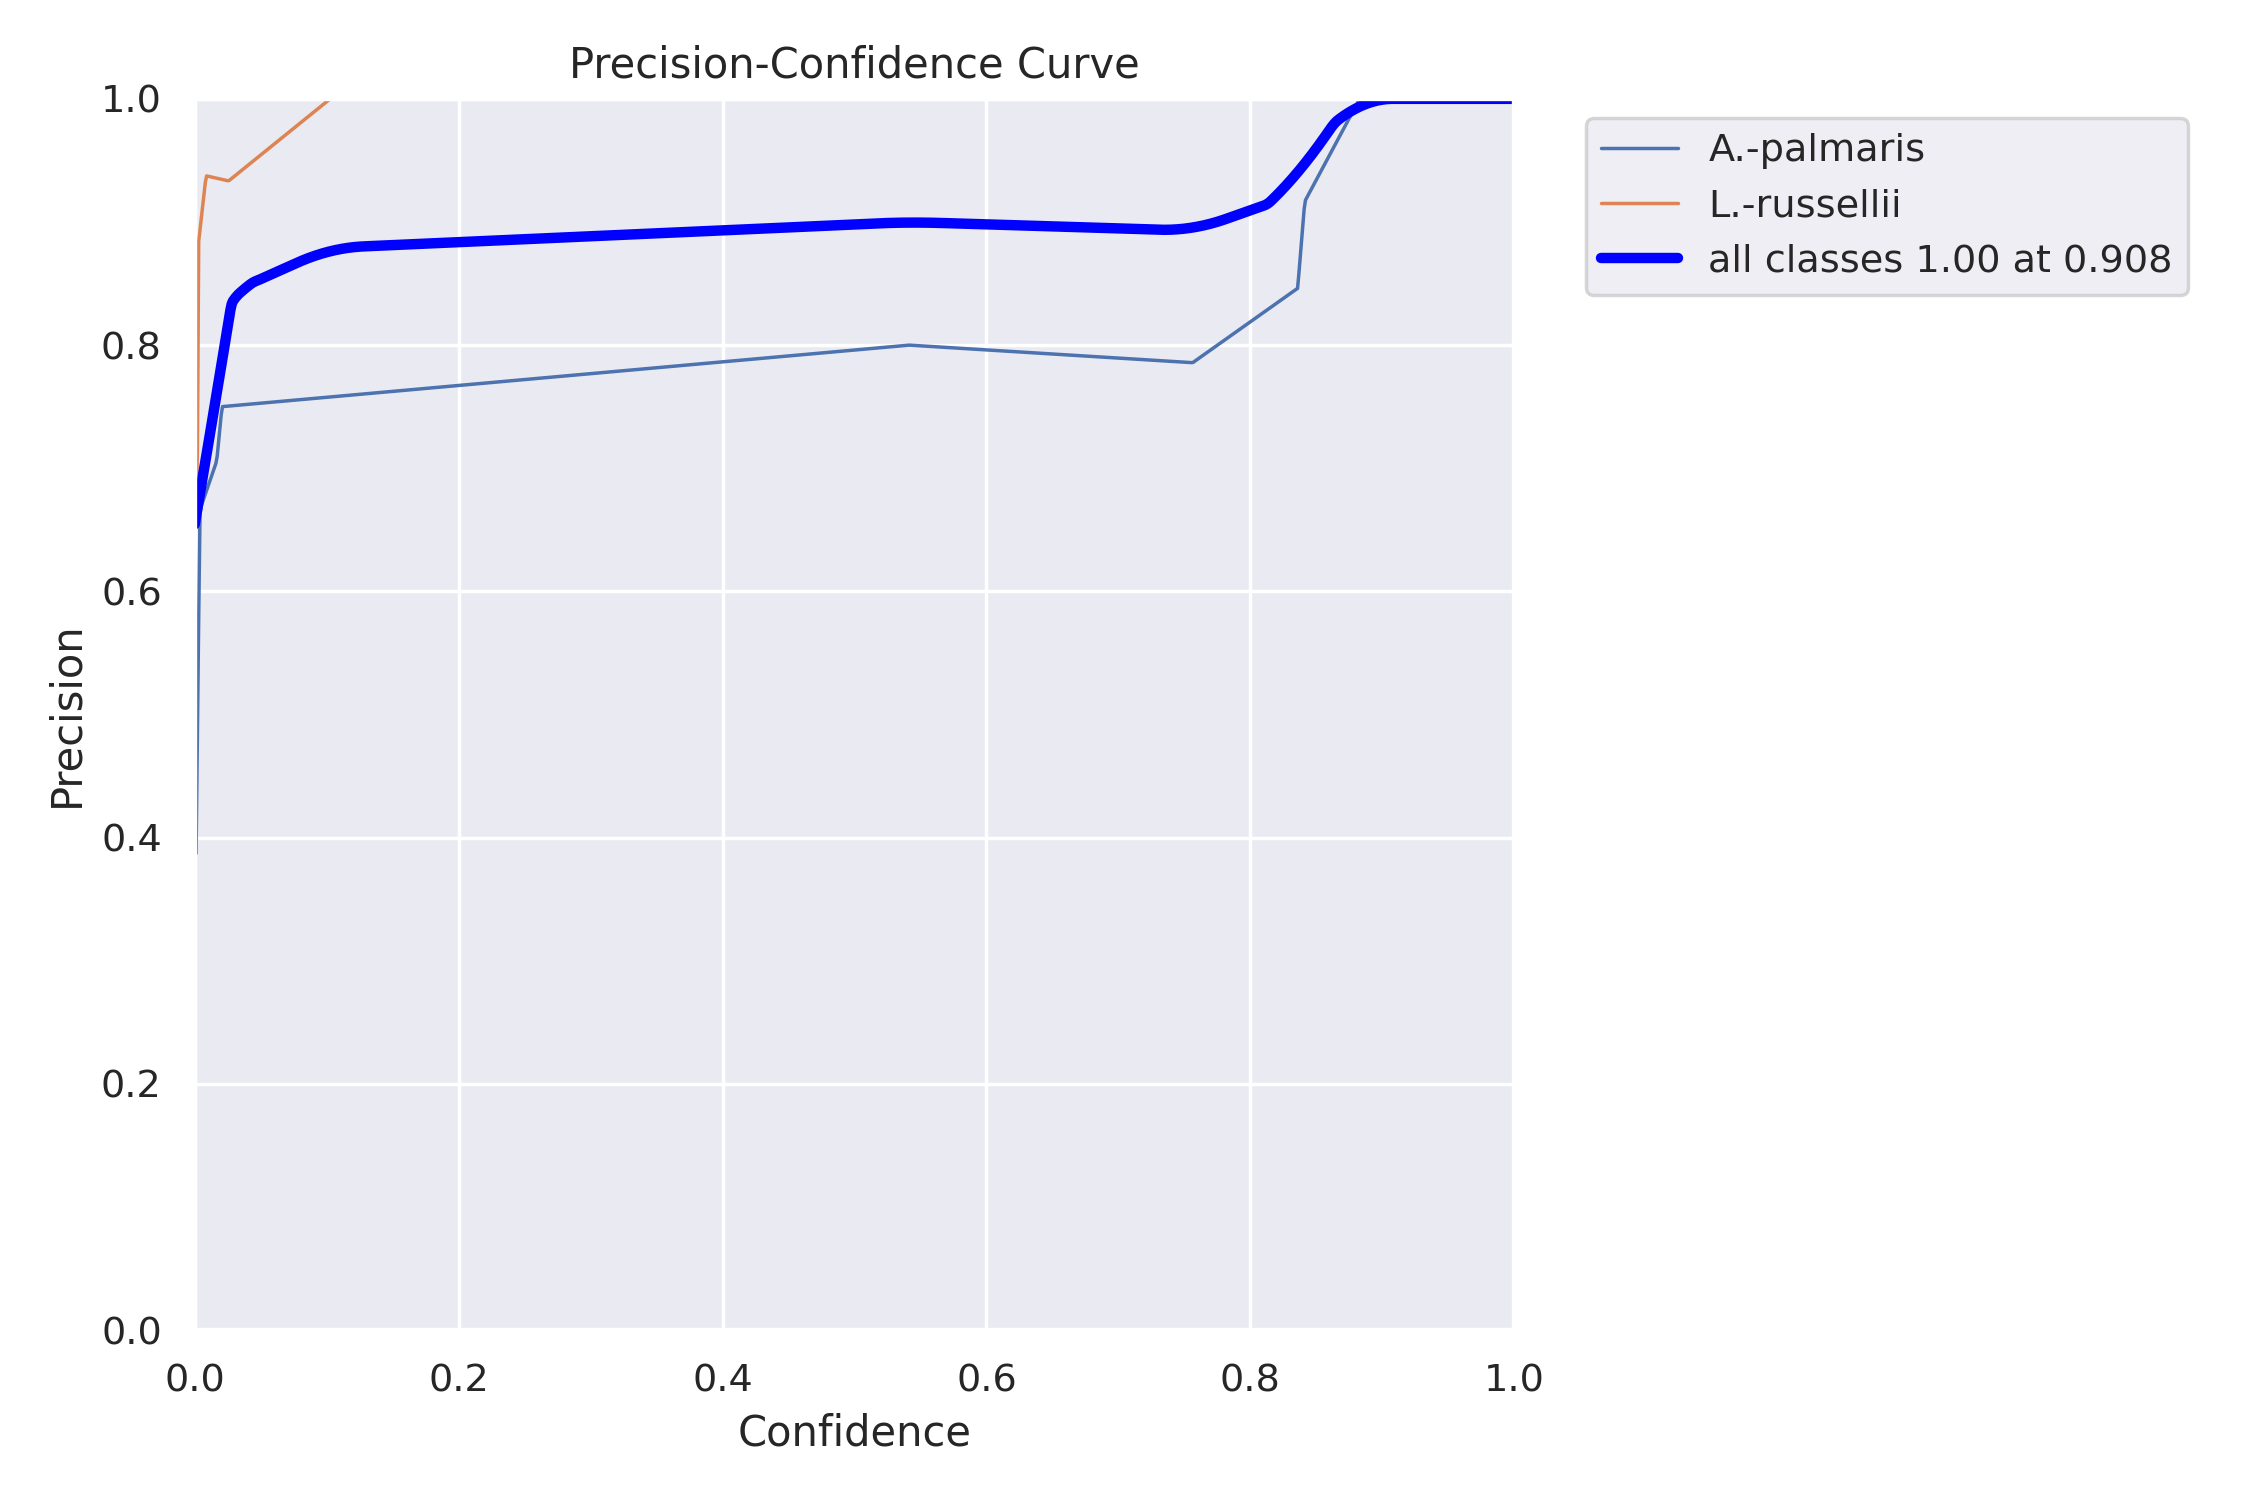

In [7]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

/content


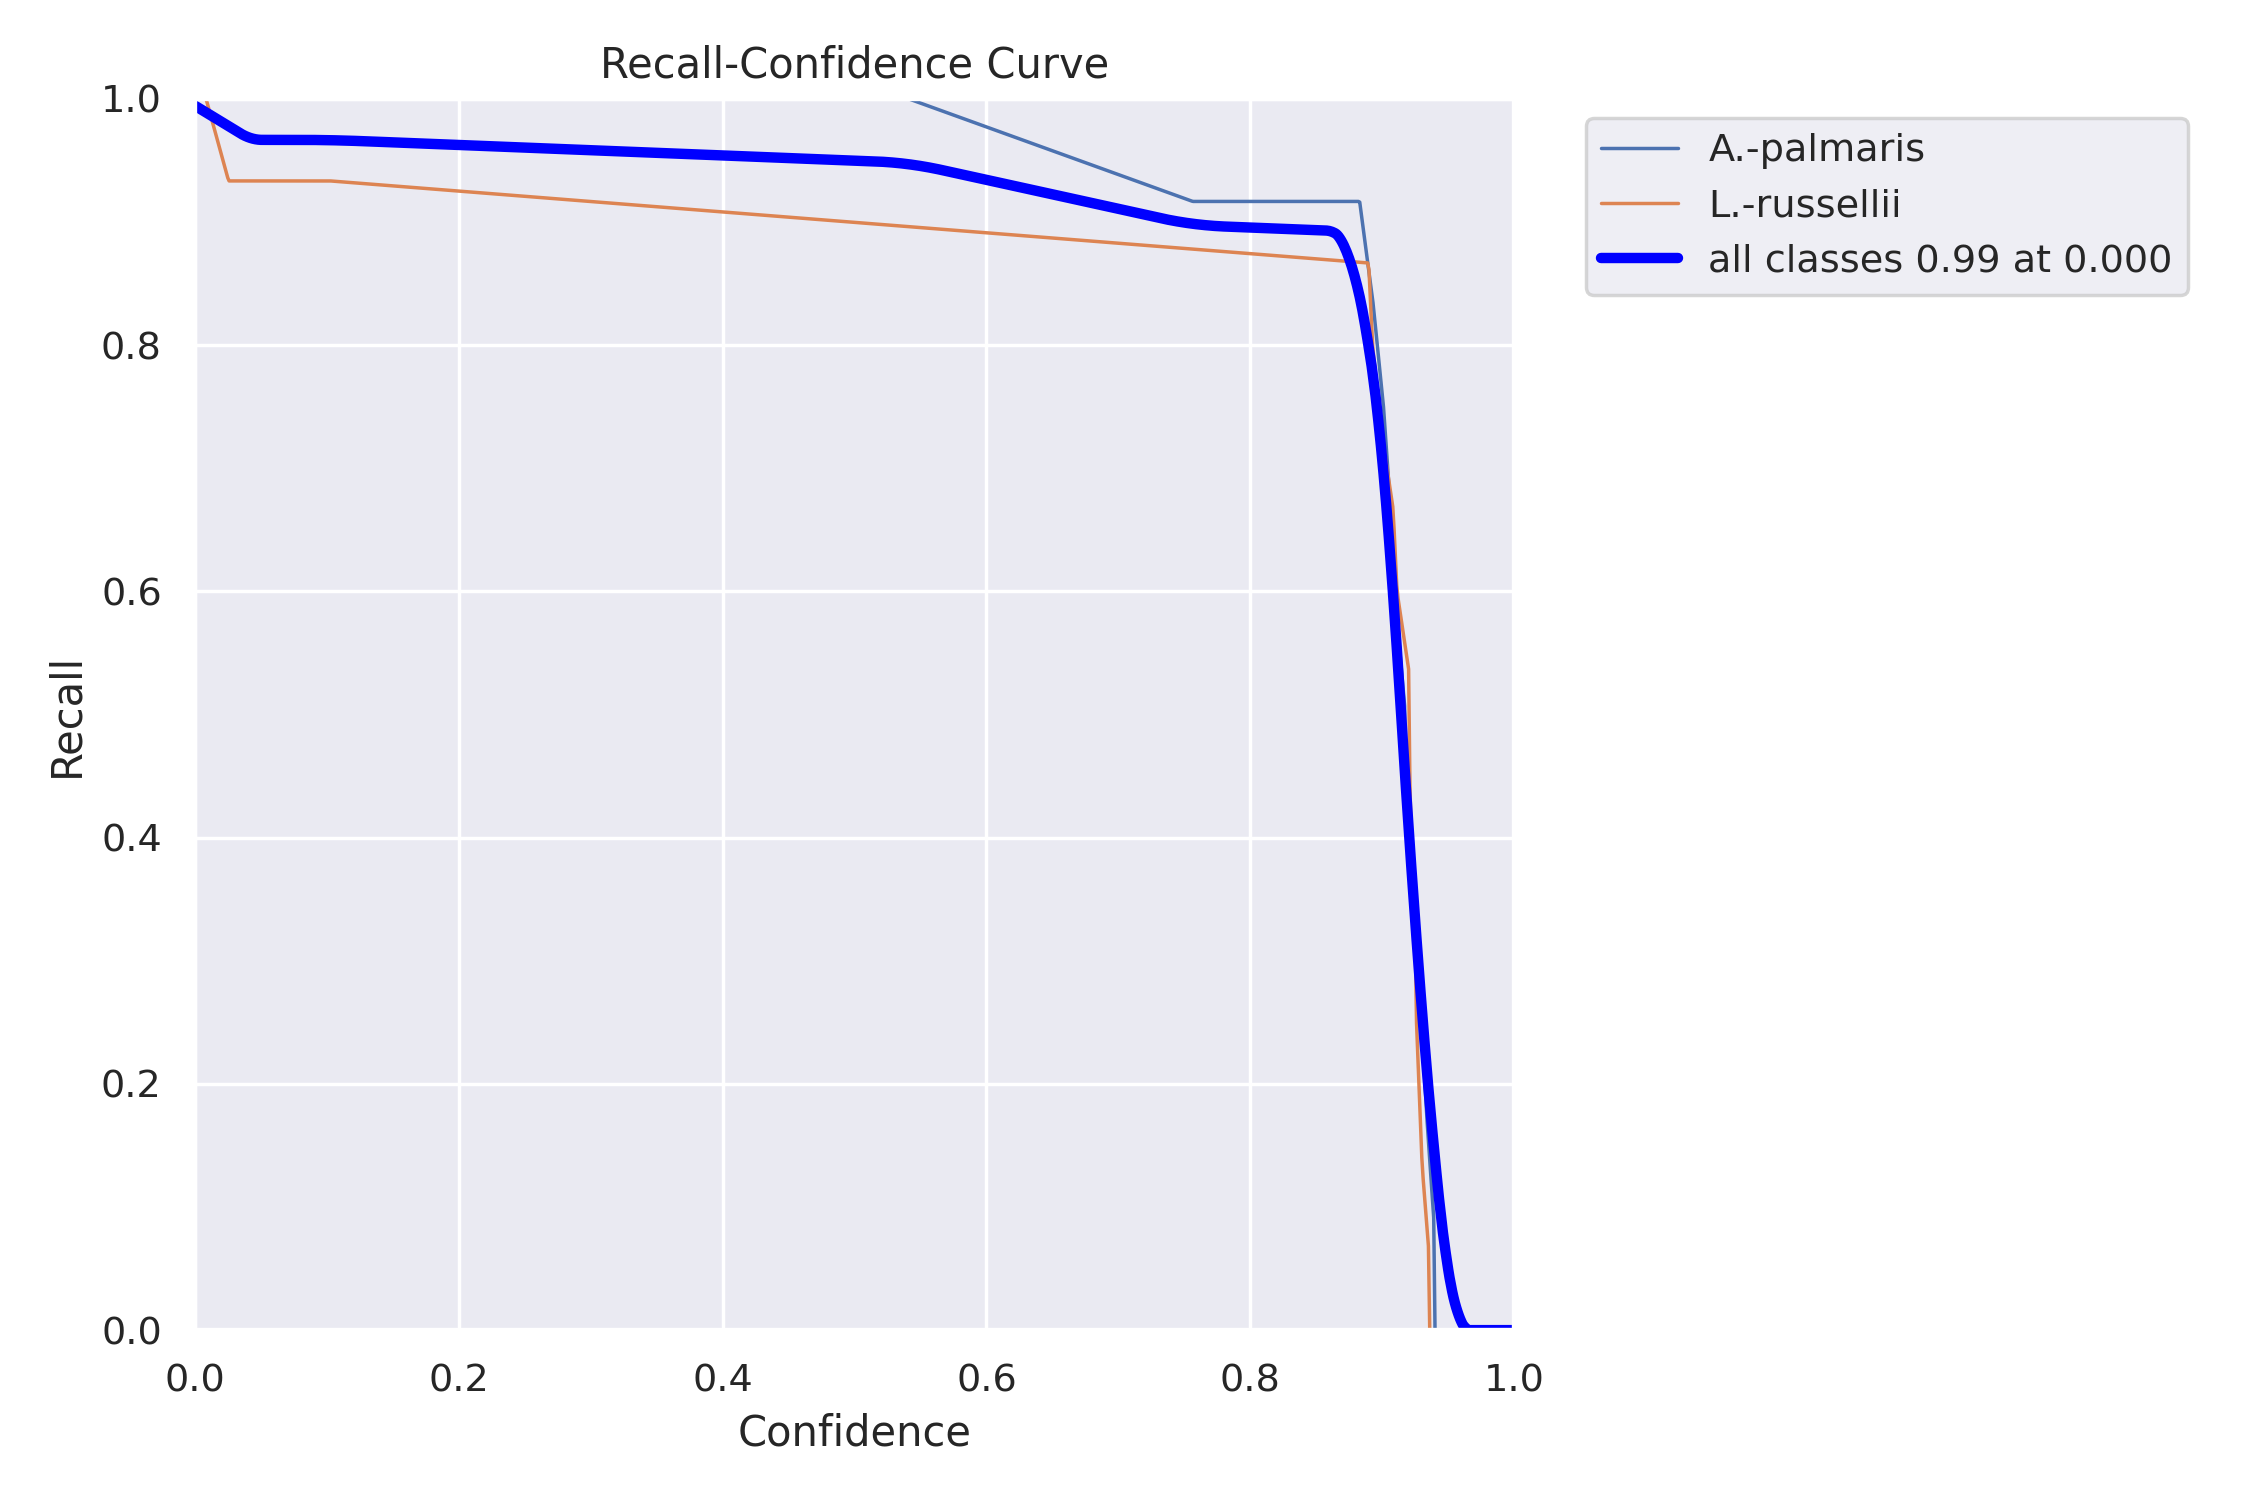

In [8]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

/content


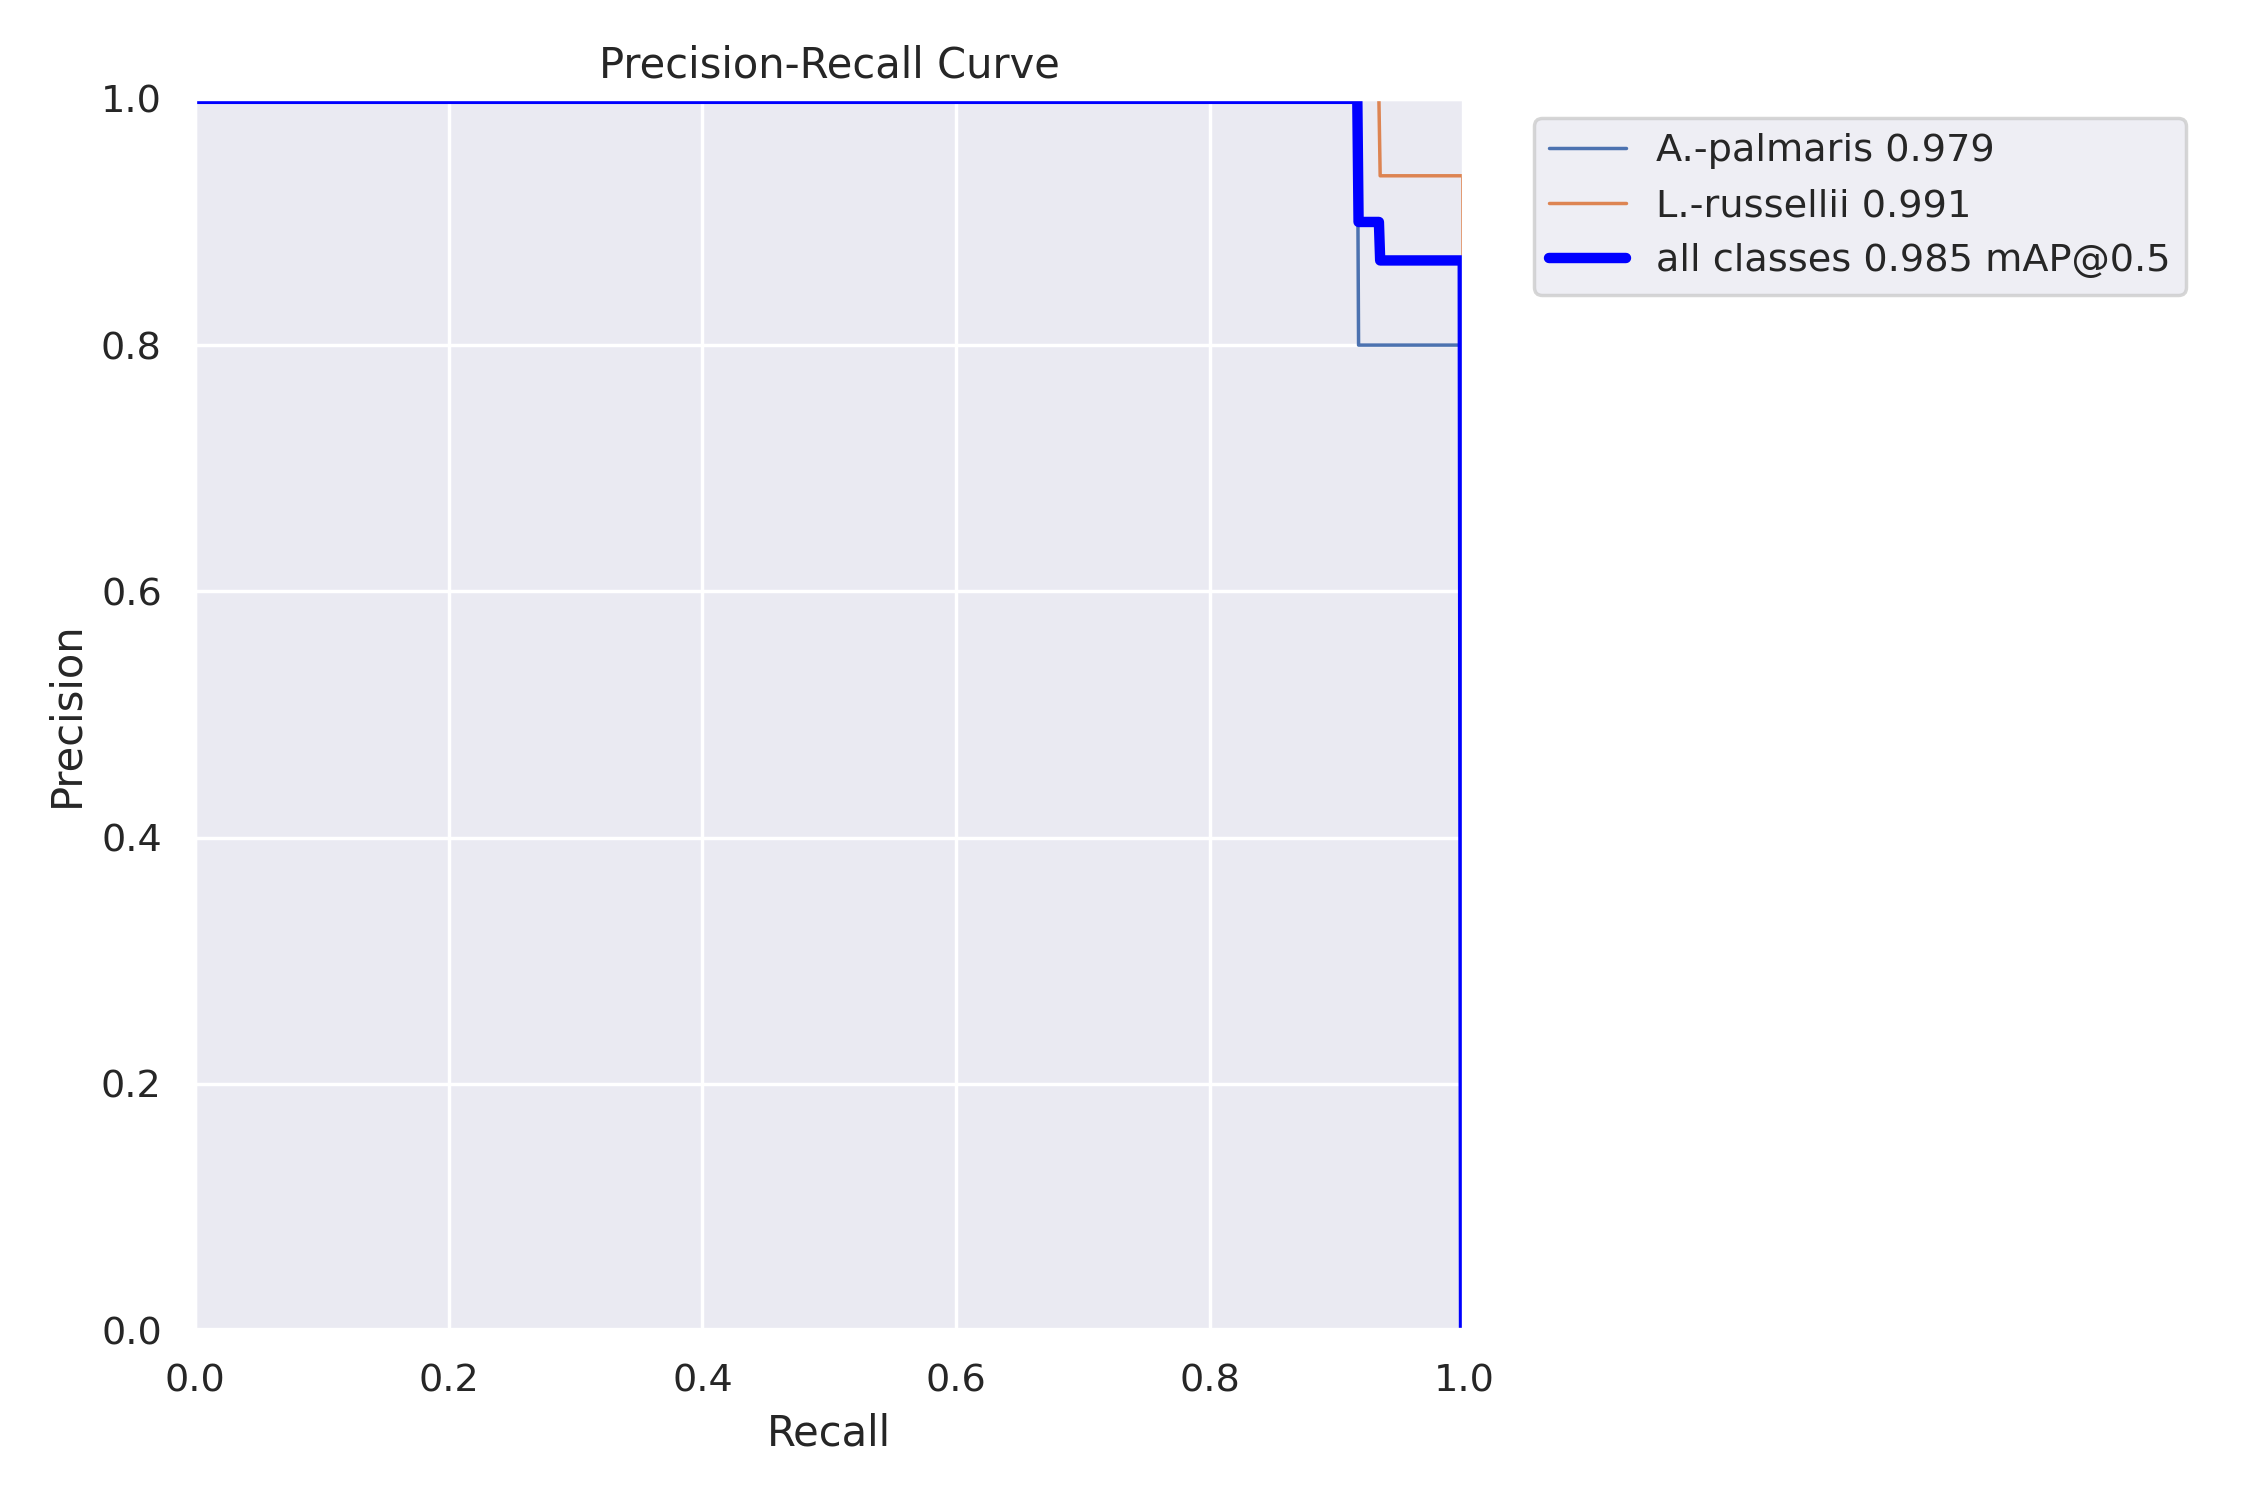

In [9]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

/content


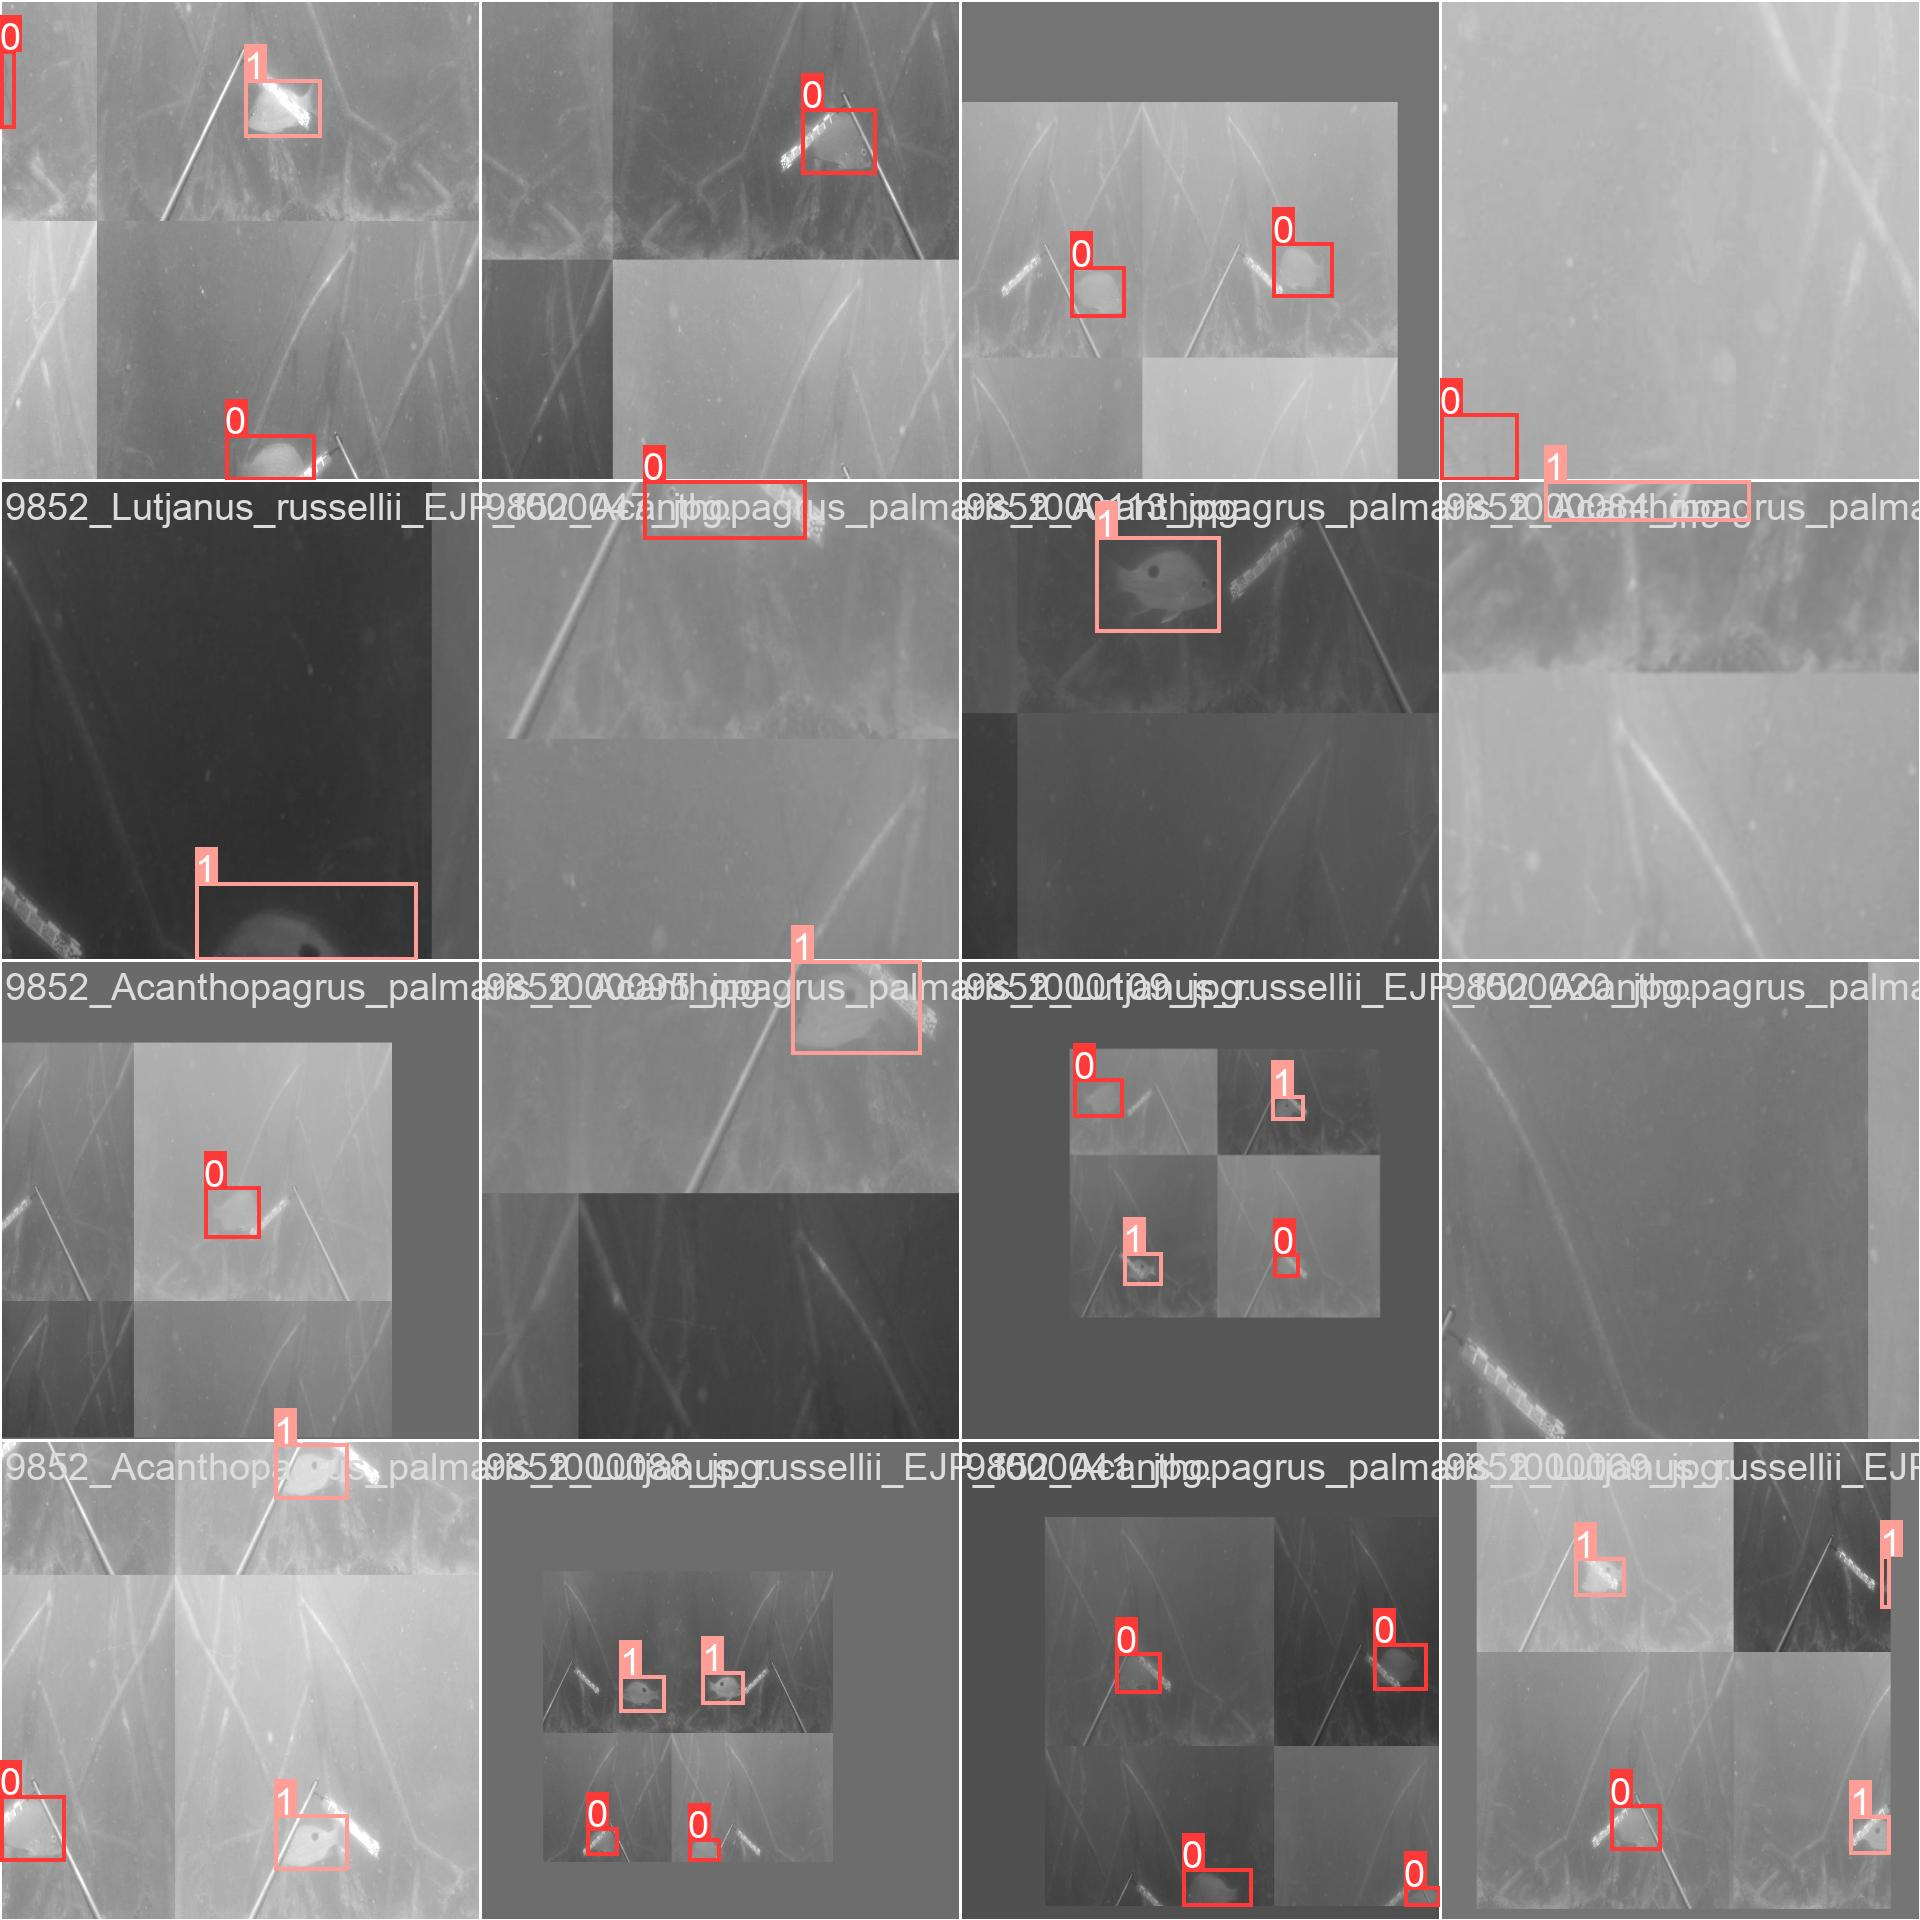

In [10]:
%cd {HOME}

Image(filename='/content/runs/detect/train/train_batch0.jpg', width=600)